In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import random
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.font_manager as fm

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2024-04-17 01:17:41--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-04-17 01:17:41--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.4’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.003s  

2024-04-17 01:17:41 (33.6 MB/s) - 

In [ ]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS246/data/Financial_issue.csv')
df.head(10)

,ประทับเวลา,1.1) เพศ,1.2) ปัจจุบันนักศึกษาอยู่ชั้นปีใดในมหาวิทยาลัยธรรมศาสตร์ [ปริญญาตรี],1.3) นักศึกษากำลังศึกษาอยู่ในคณะ สถาบันหรือวิทยาลัยใด,2.1) ช่วงค่าใช้จ่ายทางการศึกษาโดยประมาณต่อภาคการศึกษา \nอธิบาย: ค่าใช้จ่ายที่เกี่ยวข้องกับการศึกษา เช่น ตำราเรียน ค่ากิจกรรมนอกสถานที่ ค่าอุปกรณ์การเรียน โดยประมาณต่อภาคการศึกษา ไม่รวมค่าธรรมเนียมการศึกษา,2.2) ช่วงค่าใช้จ่ายด้านอาหารโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าอาหาร ของกิน น้ำดื่ม โดยเฉลี่ยประมาณต่อเดือน,2.3) ช่วงค่าใช้จ่ายด้านความสวยความงามโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าใช้จ่ายที่เกี่ยวข้องกับความสวยความงามทั้งหมด เช่น ค่าสกินแคร์ ค่าเสื้อผ้า ค่าน้ำหอม,2.4) ช่วงค่าใช้จ่ายด้านของใช้จำเป็นส่วนตัวโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าสบู่ ค่าอุปกรณ์ซักผ้า ไม่รวมค่าใช้จ่ายด้านความสวยงามของตนเอง โดยเฉลี่ยประมาณต่อเดือน,2.5) ช่วงค่าใช้จ่ายค่าไฟฟ้าโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าไฟฟ้าโดยเฉลี่ยต่อเดือน,2.6) ช่วงค่าใช้จ่ายด้านการเดินทางโดยเฉลี่ยประมาณต่อเดือน\nอธิบาย: ค่าเดินทางโดยรวม ค่าน้ำมัน,...,สอบถามความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์ [3.4) ท่านมีความคิดเห็นอย่างไรกับราคาค่าธรรมเนียมการศึกษาในฐานะนักศึกษา มหาวิทยาลัยธรรมศาสตร์],สอบถามความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์ [3.5) ท่านมีความคิดเห็นอย่างไรกับราคาค่าใช้จ่ายที่เกี่ยวข้องกับการศึกษาในฐานะนักศึกษา มหาวิทยาลัยธรรมศาสตร์],4.1) นักศึกษามีสภาวะทางการเงินเป็นอย่างไร,4.2) นักศึกษามีการวางแผนทางการเงินหรือไม่,4.3) นักศึกษามีเงินออมหรือไม่,4.4) นักศึกษามีหนี้สินหรือไม่ \nอธิบาย: หนี้สินที่เกิดจากพฤติกรรมการใช้จ่าย ไม่รวมถึงหนี้สินที่เกิดจากการลงทุน,4.5) นักศึกษามีการลงทุนหรือไม่,4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์,4.7) ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ,หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต
0,2567/03/30 3:45:38 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,1,1,รายได้เท่ากับรายจ่าย,ไม่มี,ไม่มี,ไม่มี,ไม่มี,ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของม...,ใช้จ่ายเงินไปกับอาหารเยอะมาก,NaN
1,2567/03/30 3:47:58 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 4 (รหัส 63),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,301 - 600,...,3,2,รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,ไม่มี,ค่าอาหารแพง,รายได้น้อยกว่ารายจ่าย,NaN
2,2567/03/30 8:26:28 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"3,001 - 5,000","5,001 - 7,000","1,501 - 2,500","501 - 1,500",601 - 900,น้อยกว่าหรือเท่ากับ 300,...,3,3,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,มี,ค่าครองชีพต่อเดือนค่อนข้างใช้สูงหากเป็นค่าอาหา...,บางครั้งเกิดการใช้จ่ายกับอาหารการกินโดยใช่เรื่...,NaN
3,2567/03/30 8:33:26 หลังเที่ยง GMT+7,LGBTQIA+,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"1,001 - 3,000","3,001 - 5,000","501 - 1,500","501 - 1,500",น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 300,...,4,5,รายได้น้อยกว่ารายจ่าย,ไม่มี,ไม่มี,มี,ไม่มี,แพง เมื่อเทียบกับค่าครองชีพในกรุงเทพที่ราคาไม่...,รายได้น้อยกว่ารายจ่าย,NaN
4,2567/03/30 9:42:42 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","3,001 - 5,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,3,4,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,ไม่มี,ค่าครองชีพค่อนข้างแพงถ้าเทียบกับคุณภาพชีวิต,ค่าใช้จ่ายรายสัปดาห์ไม่พอใช้ ค่าอาหารแพง,NaN
5,2567/04/01 1:00:14 หลังเที่ยง GMT+7,LGBTQIA+,ชั้นปีที่ 3 (รหัส 64),คณะเศรษฐศาสตร์,"1,001 - 3,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,"901 - 1,200",...,3,2,รายได้น้อยกว่ารายจ่าย,ไม่มี,ไม่มี,มี,ไม่มี,โดยรวมค่าใช้จ่ายค่อนข้างสูง โดยเฉพาะค่าที่พักท...,ค่าครองชีพแพงมาก แม้ว่าจะใช้จ่ายไปกับแค่ของที่...,man.kraibudt@gmail.com
6,2567/04/01 1:25:36 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 3 (รหัส 64),คณะเศรษฐศาสตร์,"1,001 - 3,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,301 - 600,...,3,3,รายได้เท่ากับรายจ่าย,มี,มี,ไม่มี,ม

# Data Cleaning and Data Preparation

### Rename colums

In [ ]:
new_name = {'1.1) เพศ' : 'เพศ',
            '1.2) ปัจจุบันนักศึกษาอยู่ชั้นปีใดในมหาวิทยาลัยธรรมศาสตร์ [ปริญญาตรี]': 'ชั้นปี',
            '1.3) นักศึกษากำลังศึกษาอยู่ในคณะ สถาบันหรือวิทยาลัยใด': 'คณะ',
            '2.1)  ช่วงค่าใช้จ่ายทางการศึกษาโดยประมาณต่อภาคการศึกษา \nอธิบาย: ค่าใช้จ่ายที่เกี่ยวข้องกับการศึกษา เช่น ตำราเรียน ค่ากิจกรรมนอกสถานที่ ค่าอุปกรณ์การเรียน โดยประมาณต่อภาคการศึกษา ไม่รวมค่าธรรมเนียมการศึกษา ': 'ด้านการศึกษา',
            '2.2)  ช่วงค่าใช้จ่ายด้านอาหารโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าอาหาร ของกิน น้ำดื่ม โดยเฉลี่ยประมาณต่อเดือน ': 'ด้านอาหาร',
            '2.3)  ช่วงค่าใช้จ่ายด้านความสวยความงามโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าใช้จ่ายที่เกี่ยวข้องกับความสวยความงามทั้งหมด เช่น ค่าสกินแคร์ ค่าเสื้อผ้า ค่าน้ำหอม ' : 'ด้านความงาม',
            '2.4)  ช่วงค่าใช้จ่ายด้านของใช้จำเป็นส่วนตัวโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าสบู่ ค่าอุปกรณ์ซักผ้า ไม่รวมค่าใช้จ่ายด้านความสวยงามของตนเอง โดยเฉลี่ยประมาณต่อเดือน ': 'ด้านของจำเป็นส่วนตัว',
            '2.5) ช่วงค่าใช้จ่ายค่าไฟฟ้าโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าไฟฟ้าโดยเฉลี่ยต่อเดือน ': 'ด้านค่าไฟฟ้า',
            '2.6) ช่วงค่าใช้จ่ายด้านการเดินทางโดยเฉลี่ยประมาณต่อเดือน\nอธิบาย: ค่าเดินทางโดยรวม ค่าน้ำมัน ': 'ด้านการเดินทาง',
            '2.7) ช่วงค่าใช้จ่ายเพื่อความบันเทิงส่วนตัวโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าใช้จ่ายส่วนตัวเพื่อความบันเทิงทั้งหมด เช่น ค่าท่องเที่ยว ค่า Netflix  ค่าสถานบันเทิงโดยเฉลี่ยต่อเดือน ค่าของฟุ่มเฟือยส่วนตัว (ค่าเติมเกม ค่าสินค้าศิลปิน ค่าซับสตรีมเมอร์)' : 'ด้านความบันเทิง',
            '2.8) ช่วงค่าใช้จ่ายด้านสุขภาพส่วนตัวโดยเฉลี่ยประมาณต่อเดือน \nอธิบาย: ค่าใช้จ่ายที่เกี่ยวข้องกับด้านสุขภาพ เช่น ค่ายาที่ซื้อจากร้านทั่วไป ': 'ด้านสุขภาพ',
            'สอบถามความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์ [3.1) ท่านมีความคิดเห็นอย่างไรกับราคาอาหารในฐานะนักศึกษา มหาวิทยาลัยธรรมศาสตร์]': 'ความพึงพอใจด้านราคาอาหาร',
            'สอบถามความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์ [3.2) ท่านมีความคิดเห็นอย่างไรกับราคาที่พักในฐานะนักศึกษา มหาวิทยาลัยธรรมศาสตร์]': 'ความพอใจด้านราคาที่พัก',
            'สอบถามความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์ [3.3) ท่านมีความคิดเห็นอย่างไรกับราคาค่าเดินทางในฐานะนักศึกษา มหาวิทยาลัยธรรมศาสตร์]': 'ความพอใจด้านราคาค่าเดินทาง',
            'สอบถามความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์ [3.4)  ท่านมีความคิดเห็นอย่างไรกับราคาค่าธรรมเนียมการศึกษาในฐานะนักศึกษา มหาวิทยาลัยธรรมศาสตร์]': 'ความพอใจด้านค่าธรรมเนียมการศึกษา',
            'สอบถามความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์ [3.5)  ท่านมีความคิดเห็นอย่างไรกับราคาค่าใช้จ่ายที่เกี่ยวข้องกับการศึกษาในฐานะนักศึกษา มหาวิทยาลัยธรรมศาสตร์]': 'ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา',
            '4.1)  นักศึกษามีสภาวะทางการเงินเป็นอย่างไร ': 'สภาวะทางการเงิน',
            '4.2)  นักศึกษามีการวางแผนทางการเงินหรือไม่ ': 'การวางแผนทางการเงิน',
            '4.3)  นักศึกษามีเงินออมหรือไม่': 'เงินออม',
            '4.4) นักศึกษามีหนี้สินหรือไม่ \nอธิบาย: หนี้สินที่เกิดจากพฤติกรรมการใช้จ่าย ไม่รวมถึงหนี้สินที่เกิดจากการลงทุน': 'หนี้สิน',
            '4.5) นักศึกษามีการลงทุนหรือไม่': 'การลงทุน'}

In [ ]:
df2 = df.rename(columns = new_name)

In [ ]:
df2.head(2)

,ประทับเวลา,เพศ,ชั้นปี,คณะ,ด้านการศึกษา,ด้านอาหาร,ด้านความงาม,ด้านของจำเป็นส่วนตัว,ด้านค่าไฟฟ้า,ด้านการเดินทาง,...,ความพอใจด้านค่าธรรมเนียมการศึกษา,ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา,สภาวะทางการเงิน,การวางแผนทางการเงิน,เงินออม,หนี้สิน,การลงทุน,4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์,4.7) ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ,หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต
0,2567/03/30 3:45:38 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,1,1,รายได้เท่ากับรายจ่าย,ไม่มี,ไม่มี,ไม่มี,ไม่มี,ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของม...,ใช้จ่ายเงินไปกับอาหารเยอะมาก,NaN
1,2567/03/30 3:47:58 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 4 (รหัส 63),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,301 - 600,...,3,2,รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,ไม่มี,ค่าอาหารแพง,รายได้น้อยกว่ารายจ่าย,NaN


### จำแนกคณะตามประเภท

In [ ]:
category = {
    ('คณะนิติศาสตร์', 'คณะพาณิชยศาสตร์และการบัญชี', 'คณะรัฐศาสตร์', 'คณะเศรษฐศาสตร์', 'คณะสังคมสงเคราะห์ศาสตร์', 'คณะสังคมวิทยาและมานุษยวิทยา', 'คณะศิลปศาสตร์',
     'คณะวารสารศาสตร์และสื่อสารมวลชน', 'คณะศิลปกรรมศาสตร์', 'วิทยาลัยนานาชาติ ปรีดี พนมยงค์', 'คณะวิทยาการเรียนรู้และศึกษาศาสตร์',
     'วิทยาลัยพัฒนศาสตร์ ป๋วย อึ๊งภากรณ์', 'วิทยาลัยนวัตกรรม', 'วิทยาลัยโลกคดีศึกษา', 'วิทยาลัยสหวิทยาการ', 'วิทยาลัยนานาชาติ ปรีดี พนมยงค์') : 'สายสังคม' ,
    ('คณะวิทยาศาสตร์และเทคโนโลยี', 'คณะวิศวกรรมศาสตร์', 'คณะสถาปัตยกรรมศาสตร์และการผังเมือง', 'คณะแพทยศาสตร์', 'คณะสหเวชศาสตร์',
     'คณะทันตแพทยศาสตร์', 'คณะพยาบาลศาสตร์', 'คณะสาธารณสุขศาสตร์', 'คณะเภสัชศาสตร์', 'สถาบันเทคโนโลยีนานาชาติสิรินธร', 'วิทยาลัยแพทยศาสตร์นานาชาติจุฬาภรณ์'): 'สายวิทยาศาสตร์'}

def category_func(faculty):
  for key, val in category.items():
    if faculty in key:
      return val
  return 'Unknown'



In [ ]:
df2['สายการเรียน'] = df2['คณะ'].apply(category_func)


In [ ]:
df2.head(2)

,ประทับเวลา,เพศ,ชั้นปี,คณะ,ด้านการศึกษา,ด้านอาหาร,ด้านความงาม,ด้านของจำเป็นส่วนตัว,ด้านค่าไฟฟ้า,ด้านการเดินทาง,...,ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา,สภาวะทางการเงิน,การวางแผนทางการเงิน,เงินออม,หนี้สิน,การลงทุน,4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์,4.7) ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ,หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต,สายการเรียน
0,2567/03/30 3:45:38 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,1,รายได้เท่ากับรายจ่าย,ไม่มี,ไม่มี,ไม่มี,ไม่มี,ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของม...,ใช้จ่ายเงินไปกับอาหารเยอะมาก,NaN,สายวิทยาศาสตร์
1,2567/03/30 3:47:58 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 4 (รหัส 63),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,301 - 600,...,2,รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,ไม่มี,ค่าอาหารแพง,รายได้น้อยกว่ารายจ่าย,NaN,สายสังคม


### เตรียมข้อมูลในส่วนที่ 3 และ 4

In [ ]:
fin_df = df2.copy()
fin_df.head(5)

,ประทับเวลา,เพศ,ชั้นปี,คณะ,ด้านการศึกษา,ด้านอาหาร,ด้านความงาม,ด้านของจำเป็นส่วนตัว,ด้านค่าไฟฟ้า,ด้านการเดินทาง,...,ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา,สภาวะทางการเงิน,การวางแผนทางการเงิน,เงินออม,หนี้สิน,การลงทุน,4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์,4.7) ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ,หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต,สายการเรียน
0,2567/03/30 3:45:38 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,1,รายได้เท่ากับรายจ่าย,ไม่มี,ไม่มี,ไม่มี,ไม่มี,ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของม...,ใช้จ่ายเงินไปกับอาหารเยอะมาก,NaN,สายวิทยาศาสตร์
1,2567/03/30 3:47:58 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 4 (รหัส 63),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,301 - 600,...,2,รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,ไม่มี,ค่าอาหารแพง,รายได้น้อยกว่ารายจ่าย,NaN,สายสังคม
2,2567/03/30 8:26:28 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"3,001 - 5,000","5,001 - 7,000","1,501 - 2,500","501 - 1,500",601 - 900,น้อยกว่าหรือเท่ากับ 300,...,3,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,มี,ค่าครองชีพต่อเดือนค่อนข้างใช้สูงหากเป็นค่าอาหา...,บางครั้งเกิดการใช้จ่ายกับอาหารการกินโดยใช่เรื่...,NaN,สายวิทยาศาสตร์
3,2567/03/30 8:33:26 หลังเที่ยง GMT+7,LGBTQIA+,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"1,001 - 3,000","3,001 - 5,000","501 - 1,500","501 - 1,500",น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 300,...,5,รายได้น้อยกว่ารายจ่าย,ไม่มี,ไม่มี,มี,ไม่มี,แพง เมื่อเทียบกับค่าครองชีพในกรุงเทพที่ราคาไม่...,รายได้น้อยกว่ารายจ่าย,NaN,สายวิทยาศาสตร์
4,2567/03/30 9:42:42 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","3,001 - 5,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,4,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,ไม่มี,ค่าครองชีพค่อนข้างแพงถ้าเทียบกับคุณภาพชีวิต,ค่าใช้จ่ายรายสัปดาห์ไม่พอใช้ ค่าอาหารแพง,NaN,สายวิทยาศาสตร์


In [ ]:
#DataFrame สายสังคม
fin_social_df = (fin_df[fin_df['สายการเรียน'] != 'สายวิทยาศาสตร์']).reset_index(drop=True)
fin_social_df.head(5)

,ประทับเวลา,เพศ,ชั้นปี,คณะ,ด้านการศึกษา,ด้านอาหาร,ด้านความงาม,ด้านของจำเป็นส่วนตัว,ด้านค่าไฟฟ้า,ด้านการเดินทาง,...,ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา,สภาวะทางการเงิน,การวางแผนทางการเงิน,เงินออม,หนี้สิน,การลงทุน,4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์,4.7) ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ,หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต,สายการเรียน
0,2567/03/30 3:47:58 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 4 (รหัส 63),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,301 - 600,...,2,รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,ไม่มี,ค่าอาหารแพง,รายได้น้อยกว่ารายจ่าย,NaN,สายสังคม
1,2567/04/01 1:00:14 หลังเที่ยง GMT+7,LGBTQIA+,ชั้นปีที่ 3 (รหัส 64),คณะเศรษฐศาสตร์,"1,001 - 3,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,"901 - 1,200",...,2,รายได้น้อยกว่ารายจ่าย,ไม่มี,ไม่มี,มี,ไม่มี,โดยรวมค่าใช้จ่ายค่อนข้างสูง โดยเฉพาะค่าที่พักท...,ค่าครองชีพแพงมาก แม้ว่าจะใช้จ่ายไปกับแค่ของที่...,man.kraibudt@gmail.com,สายสังคม
2,2567/04/01 1:25:36 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 3 (รหัส 64),คณะเศรษฐศาสตร์,"1,001 - 3,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,301 - 600,...,3,รายได้เท่ากับรายจ่าย,มี,มี,ไม่มี,มี,ค่าครองชีพค่อนข้างสูง,รายได้น้อยกว่ารายจ่าย,NaN,สายสังคม
3,2567/04/01 2:15:02 หลังเที่ยง GMT+7,LGBTQIA+,ชั้นปีที่ 3 (รหัส 64),คณะเศรษฐศาสตร์,"3,001 - 5,000","5,001 - 7,000","1,501 - 2,500","501 - 1,500","1,201 - 1,500",301 - 600,...,3,รายได้น้อยกว่ารายจ่าย,มี,ไม่มี,ไม่มี,ไม่มี,แพงมากครับ ควรมีสวัสดิการสนับสนุนกว่านี้ ราคาห...,เงินเดือนชนเดือน,NaN,สายสังคม
4,2567/04/01 2:22:14 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 3 (รหัส 64),คณะเศรษฐศาสตร์,"1,001 - 3,000","3,001 - 5,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,301 - 600,...,3,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,ไม่มี,คิดว่าถ้าคนที่ใช้จ่ายแบบพอดียังไงก็ไม่รับได้ แ...,ใช้จ่ายมาก เพราะมีคอนเสิร์ตวงที่ตัวเองชอบมาแสด...,wattanadda.gaj@gmail.com,สายสังคม


In [ ]:
#DataFrame สายวิทยาศาสตร์
fin_sci_df = (fin_df[fin_df['สายการเรียน'] != 'สายสังคม']).reset_index(drop=True)
fin_sci_df.head(5)

,ประทับเวลา,เพศ,ชั้นปี,คณะ,ด้านการศึกษา,ด้านอาหาร,ด้านความงาม,ด้านของจำเป็นส่วนตัว,ด้านค่าไฟฟ้า,ด้านการเดินทาง,...,ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา,สภาวะทางการเงิน,การวางแผนทางการเงิน,เงินออม,หนี้สิน,การลงทุน,4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์,4.7) ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ,หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต,สายการเรียน
0,2567/03/30 3:45:38 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,1,รายได้เท่ากับรายจ่าย,ไม่มี,ไม่มี,ไม่มี,ไม่มี,ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของม...,ใช้จ่ายเงินไปกับอาหารเยอะมาก,NaN,สายวิทยาศาสตร์
1,2567/03/30 8:26:28 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"3,001 - 5,000","5,001 - 7,000","1,501 - 2,500","501 - 1,500",601 - 900,น้อยกว่าหรือเท่ากับ 300,...,3,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,มี,ค่าครองชีพต่อเดือนค่อนข้างใช้สูงหากเป็นค่าอาหา...,บางครั้งเกิดการใช้จ่ายกับอาหารการกินโดยใช่เรื่...,NaN,สายวิทยาศาสตร์
2,2567/03/30 8:33:26 หลังเที่ยง GMT+7,LGBTQIA+,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"1,001 - 3,000","3,001 - 5,000","501 - 1,500","501 - 1,500",น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 300,...,5,รายได้น้อยกว่ารายจ่าย,ไม่มี,ไม่มี,มี,ไม่มี,แพง เมื่อเทียบกับค่าครองชีพในกรุงเทพที่ราคาไม่...,รายได้น้อยกว่ารายจ่าย,NaN,สายวิทยาศาสตร์
3,2567/03/30 9:42:42 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","3,001 - 5,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,4,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,ไม่มี,ค่าครองชีพค่อนข้างแพงถ้าเทียบกับคุณภาพชีวิต,ค่าใช้จ่ายรายสัปดาห์ไม่พอใช้ ค่าอาหารแพง,NaN,สายวิทยาศาสตร์
4,2567/04/01 2:39:51 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"1,001 - 3,000","5,001 - 7,000",น้อยกว่าหรือเท่ากับ 500,"501 - 1,500","มากกว่า 1,500",301 - 600,...,3,รายได้เท่ากับรายจ่าย,มี,มี,ไม่มี,ไม่มี,ค่อนข้างแพง,ค่าาหารและหอพักแพงมากเกินไป,NaN,สายวิทยาศาสตร์


In [ ]:
#เปลี่ยนคะแนนเป็นระดับ
fin_part3_df = fin_df.copy()
part3_dict = {1:'1 (ถูกมาก)', 2:'2 (ถูก)', 3:'3 (เหมาะสม)', 4:'4 (แพง)', 5:'5 (แพงมาก)'}

fin_part3_df['ความพึงพอใจด้านราคาอาหาร'] = fin_part3_df['ความพึงพอใจด้านราคาอาหาร'].replace(part3_dict)
fin_part3_df['ความพอใจด้านราคาที่พัก'] = fin_part3_df['ความพอใจด้านราคาที่พัก'].replace(part3_dict)
fin_part3_df['ความพอใจด้านราคาค่าเดินทาง'] = fin_part3_df['ความพอใจด้านราคาค่าเดินทาง'].replace(part3_dict)
fin_part3_df['ความพอใจด้านค่าธรรมเนียมการศึกษา'] = fin_part3_df['ความพอใจด้านค่าธรรมเนียมการศึกษา'].replace(part3_dict)
fin_part3_df['ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา'] = fin_part3_df['ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา'].replace(part3_dict)


fin_part3_df

,ประทับเวลา,เพศ,ชั้นปี,คณะ,ด้านการศึกษา,ด้านอาหาร,ด้านความงาม,ด้านของจำเป็นส่วนตัว,ด้านค่าไฟฟ้า,ด้านการเดินทาง,...,ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา,สภาวะทางการเงิน,การวางแผนทางการเงิน,เงินออม,หนี้สิน,การลงทุน,4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์,4.7) ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ,หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต,สายการเรียน
0,2567/03/30 3:45:38 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,1 (ถูกมาก),รายได้เท่ากับรายจ่าย,ไม่มี,ไม่มี,ไม่มี,ไม่มี,ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของม...,ใช้จ่ายเงินไปกับอาหารเยอะมาก,NaN,สายวิทยาศาสตร์
1,2567/03/30 3:47:58 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 4 (รหัส 63),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,301 - 600,...,2 (ถูก),รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,ไม่มี,ค่าอาหารแพง,รายได้น้อยกว่ารายจ่าย,NaN,สายสังคม
2,2567/03/30 8:26:28 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"3,001 - 5,000","5,001 - 7,000","1,501 - 2,500","501 - 1,500",601 - 900,น้อยกว่าหรือเท่ากับ 300,...,3 (เหมาะสม),รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,มี,ค่าครองชีพต่อเดือนค่อนข้างใช้สูงหากเป็นค่าอาหา...,บางครั้งเกิดการใช้จ่ายกับอาหารการกินโดยใช่เรื่...,NaN,สายวิทยาศาสตร์
3,2567/03/30 8:33:26 หลังเที่ยง GMT+7,LGBTQIA+,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"1,001 - 3,000","3,001 - 5,000","501 - 1,500","501 - 1,500",น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 300,...,5 (แพงมาก),รายได้น้อยกว่ารายจ่าย,ไม่มี,ไม่มี,มี,ไม่มี,แพง เมื่อเทียบกับค่าครองชีพในกรุงเทพที่ราคาไม่...,รายได้น้อยกว่ารายจ่าย,NaN,สายวิทยาศาสตร์
4,2567/03/30 9:42:42 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","3,001 - 5,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,4 (แพง),รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,ไม่มี,ค่าครองชีพค่อนข้างแพงถ้าเทียบกับคุณภาพชีวิต,ค่าใช้จ่ายรายสัปดาห์ไม่พอใช้ ค่าอาหารแพง,NaN,สายวิทยาศาสตร์
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2567/04/13 9:58:39 หลังเที่ยง GMT+7,ไม่ต้องการระบุ,ชั้นปีที่ 2 (รหัส 65),คณะพยาบาลศาสตร์,"1,001 - 3,000","5,001 - 7,000","501 - 1,500","501 - 1,500","901 - 1,200",601 - 900,...,4 (แพง),รายได้เท่ากับรายจ่าย,มี,มี,ไม่มี,ไม่มี,ค่าครองชีพแพงมากเมื่อเทียบกับคุณภาพความเป็นอยู...,ค่าอาหารแพง ความเจริญกระจุกอยู่ที่เชียงราก1 ทำ...,NaN,สายวิทยาศาสตร์
122,2567/04/13 10:21:37 หลังเที่ยง GMT+7,ชาย,ชั้นปีที่ 3 (รหัส 64),คณะวิทยาศาสตร์และเทคโนโลยี,"1,001 - 3,000","7,001 - 9,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,"901 - 1,200",301 - 600,...,3 (เหมาะสม),รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,มี,โดยรวมอยู่ได้ แต่ค่าหอแพงเกินไป,ส่วนใหญ่หมดเงินไปกับของกิน,NaN,สายวิทยาศาสตร์
123,2567/04/13 11:08:13 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 3 (รหัส 64),คณะเศรษฐศาสตร์,"1,001 - 3,000","9,001 - 11,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,"1,201 - 1,500","901 - 1,200",...,3 (เหมาะสม),รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,ไม่มี,ราคาอาหารค่อนข้างสูง,ไม่มี,NaN,สายสังคม
124,2567/04/14 12:03:44 ก่อนเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,601 - 900,น้อยกว่าหรือเท่ากับ 300,...,2 (ถูก),รายได้น้อยกว่ารายจ่าย,ไม่มี,มี,มี,ไม่มี,ค่อสข้างสูงมากๆ,ส่วนมากพบเจอค่าครองชีพแถวๆมอที่สูงมากๆ เช่นค่า...,-,สายสังคม


In [ ]:
#สร้างตัวแปรจากข้อมูลที่มี
satisf_part3 = fin_df[['ความพึงพอใจด้านราคาอาหาร', 'ความพอใจด้านราคาที่พัก',
                                      'ความพอใจด้านราคาค่าเดินทาง', 'ความพอใจด้านค่าธรรมเนียมการศึกษา',
                                      'ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา']]
group_part3 = ['ความพึงพอใจด้านราคาอาหาร','ความพอใจด้านราคาที่พัก','ความพอใจด้านราคาค่าเดินทาง',
                      'ความพอใจด้านค่าธรรมเนียมการศึกษา', 'ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา']

mean_part3 = satisf_part3.mean()

print(mean_part3)

ความพึงพอใจด้านราคาอาหาร                              3.944444
ความพอใจด้านราคาที่พัก                                3.857143
ความพอใจด้านราคาค่าเดินทาง                            2.904762
ความพอใจด้านค่าธรรมเนียมการศึกษา                      2.912698
ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา    3.007937
dtype: float64


In [ ]:
#สร้าง dataframe สำหรับ Scatter Plot part3
part3_df = pd.DataFrame({'ความพึงพอใจ': ['ความพึงพอใจด้านราคาอาหาร','ความพอใจด้านราคาที่พัก','ความพอใจด้านราคาค่าเดินทาง',
                  'ความพอใจด้านค่าธรรมเนียมการศึกษา', 'ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา'],
                  'ค่าเฉลี่ยคะแนน': [3.944444, 3.857143, 2.904762, 2.912698, 3.007937],
                  'ขนาด': [3.944444*1000000000, 3.857143*1000000000, 2.904762*1000000000, 2.912698*1000000000, 3.007937*1000000000]})
part3_df

,ความพึงพอใจ,ค่าเฉลี่ยคะแนน,ขนาด
0,ความพึงพอใจด้านราคาอาหาร,3.944444,3.944444e+09
1,ความพอใจด้านราคาที่พัก,3.857143,3.857143e+09
2,ความพอใจด้านราคาค่าเดินทาง,2.904762,2.904762e+09
3,ความพอใจด้านค่าธรรมเนียมการศึกษา,2.912698,2.912698e+09
4,ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศ...,3.007937,3.007937e+09


In [ ]:
#หาข้อความทุกข้อความในcolumn 4.6
print(list(fin_df['4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์']))

['ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของมหาวิทยาลัยยังถือว่าค่อนข้างแพง หรือค่าอาหารเชียงรากก็ราคาเกือบ100จนถึง100++ ', 'ค่าอาหารแพง', 'ค่าครองชีพต่อเดือนค่อนข้างใช้สูงหากเป็นค่าอาหารก็ใช้ไป 65-70% ของค่าใช้จ่ายแล้ว ดังนั้นจะดีกว่าถ้ามีการลด cost ค่าอาหารให้ถูกลงแต่คงปริมาณและคุณภาพเอาไว้', 'แพง เมื่อเทียบกับค่าครองชีพในกรุงเทพที่ราคาไม่ต่างกันเลย', 'ค่าครองชีพค่อนข้างแพงถ้าเทียบกับคุณภาพชีวิต', 'โดยรวมค่าใช้จ่ายค่อนข้างสูง โดยเฉพาะค่าที่พักที่มีราคาสูงมากเกินไป', 'ค่าครองชีพค่อนข้างสูง', 'แพงมากครับ ควรมีสวัสดิการสนับสนุนกว่านี้ ราคาหอในที่สูงมากจนทำให้ราคาหอนอกยิ่งพุ่งทยานตามไปด้วย', 'คิดว่าถ้าคนที่ใช้จ่ายแบบพอดียังไงก็ไม่รับได้ แบบถ้าใช้จ่ายปกติๆกินอาหาร ค่าเดินทางทั่วไป ก็ถือว่าพอดีอยู่', 'ค่อนข้างแพง', 'สูงเกินไปมาก', 'ค่าครองชีพสูงมาก ', 'แพงบางอย่าง', 'คิดว่าการเดินทางสะดวกสะบาย ไม่เสียค่าใช้ใจ มีเอนจี้รับส่งหลายรอบ แม้จะขาดตอนและมาช้าบ้าง ส่วนค่าอาหารถือว่าค่อนข้างราคาสูง', 'ค่าครองชีพค่อนข้างแพง สวนทางกับคุณภาพชีวิตที่ควรได้ อาหารไม่สะอาด แพง ทำให้นักศึกษาไม่อยากกิน ร้า

In [ ]:
#wordcloud 4.6
replace_dict_word1 = {'ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของมหาวิทยาลัยยังถือว่าค่อนข้างแพง หรือค่าอาหารเชียงรากก็ราคาเกือบ100จนถึง100++ ':'ค่าครองชีพสูง', 'ค่าอาหารแพง':'อาหารแพง',
                     'ค่าครองชีพต่อเดือนค่อนข้างใช้สูงหากเป็นค่าอาหารก็ใช้ไป 65-70% ของค่าใช้จ่ายแล้ว ดังนั้นจะดีกว่าถ้ามีการลด cost ค่าอาหารให้ถูกลงแต่คงปริมาณและคุณภาพเอาไว้':'ค่าครองชีพสูง',
                     'แพง เมื่อเทียบกับค่าครองชีพในกรุงเทพที่ราคาไม่ต่างกันเลย':'ค่าครองชีพสูง', 'ค่าครองชีพค่อนข้างแพงถ้าเทียบกับคุณภาพชีวิต':'ค่าครองชีพสูง',
                     'โดยรวมค่าใช้จ่ายค่อนข้างสูง โดยเฉพาะค่าที่พักที่มีราคาสูงมากเกินไป':'ค่าที่พักสูงไป', 'ค่าครองชีพค่อนข้างสูง':'ค่าครองชีพสูง',
                     'แพงมากครับ ควรมีสวัสดิการสนับสนุนกว่านี้ ราคาหอในที่สูงมากจนทำให้ราคาหอนอกยิ่งพุ่งทยานตามไปด้วย':'ค่าที่พักสูงไป',
                      'คิดว่าถ้าคนที่ใช้จ่ายแบบพอดียังไงก็ไม่รับได้ แบบถ้าใช้จ่ายปกติๆกินอาหาร ค่าเดินทางทั่วไป ก็ถือว่าพอดีอยู่':'เหมาะสม',
                      'ค่อนข้างแพง':'ค่อนข้างแพง', 'สูงเกินไปมาก':'ค่าครองชีพสูง', 'ค่าครองชีพสูงมาก ':'ค่าครองชีพสูง', 'แพงบางอย่าง':'บางอย่างราคาแพง',
                      'คิดว่าการเดินทางสะดวกสะบาย ไม่เสียค่าใช้ใจ มีเอนจี้รับส่งหลายรอบ แม้จะขาดตอนและมาช้าบ้าง ส่วนค่าอาหารถือว่าค่อนข้างราคาสูง':'อาหารแพง',
                      'ค่าครองชีพค่อนข้างแพง สวนทางกับคุณภาพชีวิตที่ควรได้ อาหารไม่สะอาด แพง ทำให้นักศึกษาไม่อยากกิน ร้านอาหารก็ขายไม่ได้ มหาวิทยาลัยควรมีการจัดสรรเพื่อช่วยสนับสนุนทั้ง2ฝ่ายมากกว่านี้ การเดินทางยากและใช้เวลานานหากไม่มีรถส่วนตัว':'ค่าครองชีพสูง',
                      'สูงระดับหนึ่งในด้านอาหาร':'อาหารแพง', 'ค่าครองชีพค่อนข้างสูง':'ค่าครองชีพสูง', 'มีราคาที่ค่อนข้างสูงไปนิดนึง':'แพง', 'ไม่พอใช้':'เงินไม่พอใช้',
                      'รู้สึกว่าบางอย่างมันมี cost ที่อยู่ในระดับที่ยังลดราคาได้อยู่ รวม ๆ คือค่าครองชีพค่อนข้างแพง':'ค่าครองชีพสูง', 'แพงเมื่อเทียบกับสภาพแวดล้อม':'แพง',
                      'หลายอย่างแพงแต่ค่าเทอมถูก':'แพง', 'ค่าครสูง':'ค่าครองชีพสูง', 'ค่อนข้างสูง':'ค่าครองชีพสูง', 'แพงนิดหน่อย':'แพง', 'แพงเกินกว่าคุณภาพชีวิตที่ได้รับ':'แพง', '-':'',
                      'แพงไปหน่อยสำหรับเด็กที่ยังขอเงินพ่อแม่':'แพง', 'ทุกอย่างแพงกว่าตอนอยู่มัธยม ที่เป็นโรงเรียนใจกลางเมือง':'แพง',
                      'ค่าครองชีพค่อนข้างสูง เมื่อเทียบกับภายในตัวเมืองแทบจะเท่ากันหรือสูงกว่า':'ค่าครองชีพสูง', 'เเพงมาก':'แพง', '-':'', 'ไม่สะท้อนต้นทุนที่แท้จริง':'ค่อนข้างแพง',
                      'รู้สึกแพงเกินไปทั้งๆที่รอบมอไม่มีอะไรที่ควรจะแพง':'แพง', 'สำหรับราคาอาหารโดยทั่วไปในมอถือว่าสมเหตุสมผลดี แต่ถ้าเป็นรอบๆมอโดยนอกราคาก็จะสูงขึ้นมา ':'เหมาะสม',
                      'ค่าอาหารค่อนข้างแพงสำหรับนักศึกษา หนึ่งวันอย่างต่ำ 150 บาท เฉพาะค่าข้าว':'อาหารแพง', 'แพง':'แพง', 'ค่าครองชีพสูงพอๆกับในเมือง เช่น ค่าอาหาร ค่าหอพัก':'ค่าครองชีพสูง',
                      'ค่าครองชีพสูง ':'ค่าครองชีพสูง', 'ถ้าบริหารเงินอย่างดีเอาตัวรอดได้แน่นอน':'เหมาะสม', 'ค่าอาหารในมหาวิทยาลัยธรรมศาสตร์สูงกว่ามหาวิทยาลัยบางแห่งที่อยู่ในเมือง':'ค่าครองชีพสูง',
                      'แพงเกินไป':'แพง', 'ค่าครองชีพสูงมาก':'ค่าครองชีพสูง', 'ราคาค่อนข้างสูงในทุกด้าน ทั้งค่าอาหาร ค่าเดินทาง ค่าที่อยู่อาศัย':'แพง', 'แพงมากกก':'แพง', '-':'',
                      'ค่าครองชีพแพงมากหากเทียบกับคุณภาพสิ่งต่างๆ ที่ได้รับ ไม่ว่าจะเป็นอาหาร ค่าหอ (หอราคาแพงแต่รู้สึกไม่คุ้มค่า) ค่าไฟ(โดยเฉพาะหอใน) ':'ค่าครองชีพสูง',
                      'แพงเกิน ไม่ได้อยู่ในเมืองด้วยซ้ำ ':'แพง', 'ค่าครองชีพสูงเท่าค่าครองชีพในกรุงเทพเลยค่ะ':'ค่าครองชีพสูง', 'ค่าใช้จ่ายพอรับได้ถึงสูง':'เหมาะสม',
                      'อาหารในบางโรงอาหารและที่พักอาศัยรอบๆมธแพงเกินไป':'ค่าหอและอาหารสูง', 'ค่อนข้างสูง':'ค่าครองชีพสูง', 'แอบแพงนิดหน่อย':'แพง',
                      'ค่าครองชีพค่อนข้างสูงในระดับนึง หลัก ๆ คือ ค่าหอกับค่าอาหาร ถ้าพยายามวางแผนดี ๆ เลือกอยู่เลือกกินก็ประหยัดได้ แต่จริง ๆ ผู้ที่เกี่ยวข้องทุกคนควรเข้ามาจัดการและควบคุมเรื่องค่าครองชีพให้สมเหตุสมผลได้ ทุกคนจะได้มีคุณภาพชีวิตที่สอดคล้องกับค่าครองชีพ':'ค่าหอและอาหารสูง',
                      '-':'', 'แพง':'แพง', 'ค่อนข้างสูงถ้าเทียบกับมหาวิทยาลัยอื่นๆ ในตัวเมือง':'ค่าครองชีพสูง', 'ราคาค่อนข้างสูง':'ค่าครองชีพสูง', 'แพง':'แพง', 'แพง':'แพง', 'หอพักแพง อาหารนอกมอแพง':'ค่าหอและอาหารสูง',
                      'ไม่ได้แพงมากจนรู้สึกถูกขูดรีด ถ้าเทียบกับในตัวเมือง':'เหมาะสม', 'แพง':'แพง', 'ปนๆกันไป บางอย่างก็เหมาะสมกับราคา บางอย่างก็ค่อนข้างแพง':'บางอย่างราคาแพง',
                      'ค่าครองชีพราคาสูงเกินและไม่สอดคล้องกับสภาพเศรษฐกิจบริเวณโดยรอบมหาวิทยาลัย โดยเฉพาะค่าอาหารในโรงอาหารในมหาวิทยาลัย เมื่อเทียบกับม.อื่น ๆ ที่มีการควบคุมราคาให้เหมาะสมกับฐานะนักศึกษา และค่าหอพักนอกที่ราคาสูง สวนทางกับสภาพเศรษฐกิจเช่นกัน':'ค่าหอและอาหารสูง',
                      '-':'', 'จ่ายได้แต่แอบแพง':'แพง', 'แพงมาก ข้าวแพง หอแพง':'ค่าหอและอาหารสูง', 'สูงนิดหน่อย':'ค่าครองชีพสูง', 'แพงไปหน่อย':'แพง', 'สมเหตุสมผล':'เหมาะสม', 'ค่าอาหารแพง':'อาหารแพง',
                      'แพงสำหรับนักศึกษา':'แพง', 'ค่าอาหารในโรงอาหารแพงแม้เป็นโรงอาหารหอใน':'อาหารแพง', 'อาหารแพง':'อาหารแพง', 'หลายๆอย่างแพงกว่าที่คาดคิด':'แพง', 'แพง':'แพง',
                      'แอบแพงเทียบกับมหาลัยอื่นๆ':'แพง', 'เฉยๆ':'เหมาะสม', '-':'', 'สวัสดิการไม่คุ้มกับค่าเทอม':'ค่าครองชีพสูง', 'ค่าครองชีพแพง':'ค่าครองชีพสูง', 'ราคาค่าครองชีพสูงไม่คุ้มกับคุณภาพ':'ค่าครองชีพสูง',
                      'ค่าครองชีพค่อนข้างสูงสำหรับมหาวิทยาลัยนอกเมือง':'ค่าครองชีพสูง', '-':'', 'คุณภาพอาหารและที่พักไม่คุ้มค่ากับราคา':'ค่าหอและอาหารสูง', 'อาหารแพงมากโดยเฉพาะนอกมอ':'อาหารแพง',
                      'อาหารในมอราคาโอเค แต่อาหารนอกมอแพงมาก':'อาหารแพง', 'ค่าครองชีพสูง':'ค่าครองชีพสูง', 'แพง':'แพง', 'แพง':'แพง', 'ค่าครองชีพสูง':'ค่าครองชีพสูง',
                      'คิดว่าค่าอาหารในมหาวิทยาลัยค่อนข้างแพง บางร้านให้ปริมาณน้อย ส่วนหอนอกมหาวิทยาลัยราคาแพงมาก และค่าไฟฟ้าค่อนข้างแพง':'ค่าหอและอาหารสูง',
                      'อาหารนอกมอแพงมาก':'อาหารแพง', 'ค่าอาหารและค่าหอพักรวมถึงค่าไฟแพงมาก':'ค่าหอและอาหารสูง', 'หอแพงมาก ถ้าเทียบกับคุณภาพ':'ค่าที่พักสูงไป', 'สูง':'ค่าครองชีพสูง',
                      'แพงงงง':'แพง', 'ไม่ได้แพงมาก':'เหมาะสม', 'เหมาะสม':'เหมาะสม', 'แพงบางอย่าง':'บางอย่างราคาแพง', 'แพงแค่ราคาอาหารกับหอพัก แต่พวกค่าเดินทางถูก':'ค่าหอและอาหารสูง',
                      'อยู่รังสิตได้ อยู่ได้ทุกที่':'ค่าครองชีพสูง', 'ปกติ อาหารนอกมอแพงนิดหน่อย':'เหมาะสม',
                      'ค่าหอแพงมาก แถวนี้ก็ไม่ได้เจริญเลย':'ค่าที่พักสูงไป', 'ค่ากินกับค่าหอ ค่าน้ำ ค่าไฟ แพงมาก อย่างอื่นปกติดี':'ค่าหอและอาหารสูง', '-':'',
                      'แองจี้น้อยทำให้ต้องนั่งวิน แต่วินราคาไม่แพงยกเว้นบางคัน':'เหมาะสม', 'ของกินราคาแรงมาก แต่วินราคาค่อนข้างถูกค่ะ':'อาหารแพง',
                      'ของกินราคาแพงมาก หอก็แพง ':'ค่าหอและอาหารสูง', 'ราคาอาหารนอกมอแพงมาก':'อาหารแพง', 'ค่าครองชีพสูง':'ค่าครองชีพสูง', 'ค่าหอแพง ค่าไฟค่าน้ำแพง':'ค่าที่พักสูงไป',
                      'ค่าครองชีพสูงอยู่':'ค่าครองชีพสูง', 'ค่อนข้างแพง':'ค่อนข้างแพง', 'ค่าที่พักแพง':'ค่าที่พักสูงไป', 'แพง':'แพง', 'ร้านนอกมอขายแพง':'อาหารแพง', 'เชียงรากอาหารราคาแพงมากๆ ':'อาหารแพง',
                      'Expensive mak mak ka':'แพง', 'ค่าครองชีพสูงมาก ':'ค่าครองชีพสูง', 'ค่าครองชีพแพงมากเมื่อเทียบกับคุณภาพความเป็นอยู่และความเจริญ':'ค่าครองชีพสูง',
                      'โดยรวมอยู่ได้ แต่ค่าหอแพงเกินไป':'ค่าที่พักสูงไป', 'ราคาอาหารค่อนข้างสูง':'อาหารแพง', 'ค่อสข้างสูงมากๆ':'ค่าครองชีพสูง', '-':''}
fin_df['4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์'] = fin_df['4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์'].replace(replace_dict_word1)

In [ ]:
#หาข้อความทุกข้อความในcolumn 4.7
print(list(fin_df['4.7)  ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ']))

['ใช้จ่ายเงินไปกับอาหารเยอะมาก', 'รายได้น้อยกว่ารายจ่าย', 'บางครั้งเกิดการใช้จ่ายกับอาหารการกินโดยใช่เรื่อง คือเงินไม่พอกิน', 'รายได้น้อยกว่ารายจ่าย', 'ค่าใช้จ่ายรายสัปดาห์ไม่พอใช้ ค่าอาหารแพง', 'ค่าครองชีพแพงมาก แม้ว่าจะใช้จ่ายไปกับแค่ของที่จำเป็น แต่ก็ทำให้ไม่เหลือเงินออม', 'รายได้น้อยกว่ารายจ่าย', 'เงินเดือนชนเดือน', 'ใช้จ่ายมาก เพราะมีคอนเสิร์ตวงที่ตัวเองชอบมาแสดง ทำให้เงินไม่ค่อยพอใช้กัน', 'ค่าาหารและหอพักแพงมากเกินไป', 'ไม่สามารถหมุนเงินได้ตลอดทั้งเดือน', 'รายได้ไม่เพียงพอต่อรายจ่าย', 'กำหนดค่าใช้จ่ายรวมทุกอย่าง(วิน+ข้าว+น้ำ)ประมาณ150บาท คือไม่พอ', 'เพื่อนมีรายจ่ายเยอะในขณะที่รายได้น้อย ซึ่งไม่ได้ใช้เงินฟุ่มเฟือย ค่าอาหารรวมอยู่ที่ประมาณ 80 บ. ต่อ วัน', 'ไม่ทำงบรายรับรายจ่าย ไม่แบ่งสัดส่วนทางการเงิน ไม่มีการวางแผนการเงินในอนาคต ทำให้เกิดการใช้จ่ายเกินตัว', 'ใช้เงินเก็บในการใช้จ่าย', 'เงินไม่พอใช้', 'ค่าใช้จ่ายในชีวิตประจำวันค่อนข้างสูง', 'ค่าใช้จ่ายสูง แม้ว่าจะเป็นการใช้จ่ายภายในขอบเขตโรงอาหารของมหาวิทยาลัย ', 'หลายครั้งที่ค่าไฟของคนรอบตัวสูงเกินกว่าที่คาดไปมาก จนถึงหลักพันต่อคนใ

In [ ]:
#wordcloud 4.7
replace_dict_word2 ={'ใช้จ่ายเงินไปกับอาหารเยอะมาก': 'ใช้เงินกับอาหารเยอะเกินไป', 'รายได้น้อยกว่ารายจ่าย': 'รายได้น้อยกว่ารายจ่าย', 'บางครั้งเกิดการใช้จ่ายกับอาหารการกินโดยใช่เรื่อง คือเงินไม่พอกิน': 'เงินไม่เพียงพอ',
                     'รายได้น้อยกว่ารายจ่าย': 'รายได้น้อยกว่ารายจ่าย', 'ค่าใช้จ่ายรายสัปดาห์ไม่พอใช้ ค่าอาหารแพง': 'เงินไม่เพียงพอ', 'ค่าครองชีพแพงมาก แม้ว่าจะใช้จ่ายไปกับแค่ของที่จำเป็น แต่ก็ทำให้ไม่เหลือเงินออม': 'ไม่เหลือเงินออม',
                     'รายได้น้อยกว่ารายจ่าย': 'รายได้น้อยกว่ารายจ่าย', 'เงินเดือนชนเดือน': 'เงินเดือนชนเดือน', 'ใช้จ่ายมาก เพราะมีคอนเสิร์ตวงที่ตัวเองชอบมาแสดง ทำให้เงินไม่ค่อยพอใช้กัน': 'เงินไม่เพียงพอ', 'ค่าาหารและหอพักแพงมากเกินไป': 'จ่ายค่าอาหารและหอมากเกินไป',
                     'ไม่สามารถหมุนเงินได้ตลอดทั้งเดือน': 'เงินไม่เพียงพอ', 'รายได้ไม่เพียงพอต่อรายจ่าย': 'รายได้น้อยกว่ารายจ่าย', 'กำหนดค่าใช้จ่ายรวมทุกอย่าง(วิน+ข้าว+น้ำ)ประมาณ150บาท คือไม่พอ': 'เงินไม่เพียงพอ',
                     'เพื่อนมีรายจ่ายเยอะในขณะที่รายได้น้อย ซึ่งไม่ได้ใช้เงินฟุ่มเฟือย ค่าอาหารรวมอยู่ที่ประมาณ 80 บ. ต่อ วัน': 'รายได้น้อยกว่ารายจ่าย', 'ไม่ทำงบรายรับรายจ่าย ไม่แบ่งสัดส่วนทางการเงิน ไม่มีการวางแผนการเงินในอนาคต ทำให้เกิดการใช้จ่ายเกินตัว': 'ไม่วางแผนการเงินทำให้เงินไม่พอ',
                     'ใช้เงินเก็บในการใช้จ่าย': 'ใช้เงินเก็บในการใช้จ่าย', 'เงินไม่พอใช้': 'เงินไม่เพียงพอ', 'ค่าใช้จ่ายในชีวิตประจำวันค่อนข้างสูง': 'ค่าใช้จ่ายสูงเกินไป', 'ค่าใช้จ่ายสูง แม้ว่าจะเป็นการใช้จ่ายภายในขอบเขตโรงอาหารของมหาวิทยาลัย ': 'ค่าใช้จ่ายสูงเกินไป',
                     'หลายครั้งที่ค่าไฟของคนรอบตัวสูงเกินกว่าที่คาดไปมาก จนถึงหลักพันต่อคนในหอที่อยู่สองคนเท่านั้น': 'ค่าใช้จ่ายสูงเกินไป', 'เงินไม่พอ': 'เงินไม่เพียงพอ', 'ไม่มี': 'ไม่พบเจอปัญหา', 'ค่าไฟสูง': 'ค่าใช้จ่ายสูงเกินไป',
                     'ใช้เงินเกินที่ตั้งเป้าไว้ของแต่ละวัน': 'ใช้จ่ายไม่เป็นไปตามที่วางแผน', 'ยืมเงินคนอื่น': 'ยืมเงิน', 'ข้าวของแพง จนเงินไม่พอ': 'เงินไม่เพียงพอ', 'ใช้จ่ายเกินตัว': 'ไม่วางแผนการเงินทำให้เงินไม่พอ',
                     'เงินค่ากินหมดเกินโควต้า ทั้งที่กินแค่ข้าว 3 มื้อต่อวัน': 'ใช้เงินกับอาหารเยอะเกินไป', 'ใช้เงินเดือนชนเดือน ไม่ค่อยมีเหลือเก็บ เนื่องจากของแพง': 'เงินเดือนชนเดือน', 'มีหนี้สิน': 'มีหนี้สิน',
                     'ค่าข้าวถ้าไม่ใช่ที่ซื้อในโรงอาหารที่พอก็จะเเพงมาก หรือเเม้เเต่สั่งมากินเเต่ละก็ก็มื้อละ100บาทขึ้นไป': 'ค่าใช้จ่ายสูงเกินไป', '-': 'ไม่พบเจอปัญหา', 'ค่าอาหารแพงและค่าไฟแพงขึ้นเรื่อยๆ ในขณะที่บริโภคเท่าเดิม': 'ค่าใช้จ่ายสูงเกินไป',
                     'รายจ่ายมากกว่ารายได้เนื่องจากครอบครัวไม่สนับสนุน': 'รายได้น้อยกว่ารายจ่าย', 'เงินไม่พอสำหรับการลงทุนเรียนคอร์สเรียนเฉพาะด้านที่ตนเองสนใจจริง ๆ เพราะบางอย่างในมหาลัยไม่สามารถใช้เวลาสอนแบบลงรายละเอียดได้': 'เงินไม่เพียงพอ',
                     'ใช้จ่ายเกินตัว จนเป็นหนี้': 'มีหนี้สิน', 'รายได้ไม่เพียงพอต่อรายจ่าย': 'รายได้น้อยกว่ารายจ่าย', '-': 'ไม่พบเจอปัญหา', '-': 'ไม่พบเจอปัญหา', 'รายจ่ายยิบย่อยเยอะเกินไป': 'ค่าใช้จ่ายสูงเกินไป', 'ค่าหอและค่าไฟแพง': 'จ่ายค่าอาหารและหอมากเกินไป',
                     'ค่าครองชีพแพงเกินไป รายได้ไม่สัมพันธ์กับรายจ่าย': 'รายได้น้อยกว่ารายจ่าย', 'ค่าหอพักที่แพงมากๆ ถ้าอยากได้หอดีๆก็ราคาเกือบหมื่น แต่ถ้าราคาหอขนาดถูกลงมาก ส่วนมากก็สภาพไม่ค่อยดี': 'จ่ายค่าอาหารและหอมากเกินไป',
                     'เงินไม่พอใช้ในแต่ละเดือน': 'เงินไม่เพียงพอ', 'รายจ่ายที่จำเป็นมีเยอะมาก': 'ไม่วางแผนการเงินทำให้เงินไม่พอ', '-': 'ไม่พบเจอปัญหา', 'การจ่ายค่าใช้จ่ายก้อนใหญ่ที่จำเป็น โดยที่ผ่อนผันไม่ได้ในบางจังหวะที่ไม่พร้อมก็ต้องไปทำการกู้ยืม  ': 'มีหนี้สิน',
                     '-': 'ไม่พบเจอปัญหา', 'ค่าหอเเพงเกินไป': 'จ่ายค่าอาหารและหอมากเกินไป', 'วางแผนไม่ดีพอ': 'ใช้จ่ายไม่เป็นไปตามที่วางแผน', 'ค่าครองชีพสวนทางกับรายได้สูงเกินไปสำหรับนศ ที่ยังหาเลี้ยงตัวเองไม่ได้': 'ค่าใช้จ่ายสูงเกินไป',
                     'เงินไม่พอค่าใข้จ่าย': 'เงินไม่เพียงพอ', 'มีบางคนชอบยืมเงินเพื่อน': 'ยืมเงิน', 'เพื่อนบางคนต้องขยันทำงานพิเศษเพื่อให้มีเงินพอใช้ในแต่ละเดือน': 'รายได้น้อยกว่ารายจ่าย', '-': 'ไม่พบเจอปัญหา',
                     'เงินหมด': 'ไม่เหลือเงินออม', 'รายได้น้อยกว่ารายจ่าย': 'รายได้น้อยกว่ารายจ่าย', 'ไม่มี': 'ไม่พบเจอปัญหา', 'ค่าหอแพง ค่าไฟแพง': 'จ่ายค่าอาหารและหอมากเกินไป', 'ไม่มี': 'ไม่พบเจอปัญหา',
                     'เงินไม่พอ': 'เงินไม่เพียงพอ', 'เงินไม่พอใช้สิ้นเดือน ค่าใช้จ่ายเยอะ😔': 'เงินไม่เพียงพอ', 'อาหารแพง': 'ค่าใช้จ่ายสูงเกินไป', 'ไม่มี': 'ไม่พบเจอปัญหา',
                     'ค่าอาหารในมหาวิทยาลัยแพงมาก ค่าหอพักก็แพงมากเช่นกัน หอนอกราคา 8,000+ ต่อเดือน ใครจะไหวคะคุณพี่': 'ค่าใช้จ่ายสูงเกินไป', '-': 'ไม่พบเจอปัญหา', 'เพื่อนบ่นว่าหอแพง': 'จ่ายค่าอาหารและหอมากเกินไป',
                     'ค่าอาหารแพง ค่าให้จ่ายอื่นๆก็สูง': 'ค่าใช้จ่ายสูงเกินไป', 'เสียกับของกินเยอะไปหน่อย': 'ใช้เงินกับอาหารเยอะเกินไป', 'เงินหมด': 'ไม่เหลือเงินออม', '-': 'ไม่พบเจอปัญหา', 'อาหารแพงมาก': 'ค่าใช้จ่ายสูงเกินไป',
                     'เงินที่ได้ไม่พอกับค่าใช้จ่ายในมอ': 'รายได้น้อยกว่ารายจ่าย', '-': 'ไม่พบเจอปัญหา', 'อาหารในโรงอาหารและบริเวณใกล้เคียงมีราคาสูง': 'ค่าใช้จ่ายสูงเกินไป', 'เพื่อนบ่นว่าอาหารแพง': 'ค่าใช้จ่ายสูงเกินไป',
                     'เงินใช้ไม่ค่อยพอถึงสิ้นเดือน': 'เงินไม่เพียงพอ', '-': 'ไม่พบเจอปัญหา', 'คนรอบข้างมักบ่นว่าค่าอาหารแพง': 'ค่าใช้จ่ายสูงเกินไป', '-': 'ไม่พบเจอปัญหา', 'ค่าใช้ชีวิตแพง': 'ค่าใช้จ่ายสูงเกินไป', 'ได้ค่าขนมไม่พอกับค่าใช้ชีวิต': 'รายได้น้อยกว่ารายจ่าย',
                     'ค่าใช้จ่ายแพง': 'ค่าใช้จ่ายสูงเกินไป', 'บางครั้งค่าขนมก็ไม่พอกับรายจ่าย': 'รายได้น้อยกว่ารายจ่าย', '-': 'ไม่พบเจอปัญหา', 'ค่าอาหารในโรงอาหารแพงทำให้ค่าใช้จ่ายสูงกว่าที่ควร': 'ค่าใช้จ่ายสูงเกินไป',
                     'ตังหมด': 'ไม่เหลือเงินออม', 'เงินเดือนชนเดือน': 'เงินเดือนชนเดือน', 'เงินไม่พอใช้ เพราะเดินทางบ่อย': 'เงินไม่เพียงพอ', 'เงินไม่พอค่าอาหาร': 'เงินไม่เพียงพอ', 'เงินไม่พอ ': 'เงินไม่เพียงพอ',
                     'ใช้เงินเดือนชนเดือน': 'เงินเดือนชนเดือน', 'ช่วงนี้ค่าไฟฟ้าค่อนข้างแพง และค่าอาหารแพงขึ้นทำให้ไม่เพียงพอกับเงินรายเดือนที่ได้จากครอบครัว': 'รายได้น้อยกว่ารายจ่าย', 'เพื่อนมายืมเงิน': 'ยืมเงิน',
                     'รายจ่ายมากเกินกว่าเงินที่ได้รับในแต่ละเดือน': 'รายได้น้อยกว่ารายจ่าย', 'ไม่มี': 'ไม่พบเจอปัญหา', 'ค่าหอ ค่าครองชีพสูงเกินความจำเป็น': 'ค่าใช้จ่ายสูงเกินไป', 'เงินหมด': 'ไม่เหลือเงินออม',
                     'เงินไม่พอ': 'เงินไม่เพียงพอ', '-': 'ไม่พบเจอปัญหา', 'เพื่อนบ่นว่าเงินไม่พอ': 'เงินไม่เพียงพอ', 'ถูกยืมเงินจากเพื่อน': 'ยืมเงิน', 'ใช้เงินเกินตัว ไม่ประหยัด หรือยังจัดการการเงินไม่เป็น': 'ไม่วางแผนการเงินทำให้เงินไม่พอ',
                     'เงินไม่พอ': 'เงินไม่เพียงพอ', 'เพื่อนชอบบ่นว่าไม่มีเงิน อาหารแพง': 'ค่าใช้จ่ายสูงเกินไป', 'เงินหมด': 'ไม่เหลือเงินออม', '-': 'ไม่พบเจอปัญหา', 'ของกินแพง': 'ค่าใช้จ่ายสูงเกินไป',
                     'เพื่อนบ่นว่าเงินไม่พอ ': 'เงินไม่เพียงพอ', 'เพื่อนยืมเงิน': 'ยืมเงิน', 'หมดเงินไปกับของกินเยอะเกินไป': 'ใช้เงินกับอาหารเยอะเกินไป', 'เงินไม่พอใช้': 'เงินไม่เพียงพอ', 'เงินเดือนชนเดือน': 'เงินเดือนชนเดือน',
                     'เงินไม่พอ': 'เงินไม่เพียงพอ', 'ไม่เคยเจอ': 'ไม่พบเจอปัญหา', 'รายจ่ายเยอะค่าเข้าสังคม': 'ค่าใช้จ่ายสูงเกินไป', 'เงินไม่พอ': 'เงินไม่เพียงพอ', 'บ่นว่าเงินหมด ขอแม่': 'เงินไม่เพียงพอ', '-': 'ไม่พบเจอปัญหา',
                     'Cost of living ex transportation cost , foods ': 'ค่าใช้จ่ายสูงเกินไป', 'หมดเงินไปกับของกินเยอะมากๆ ': 'ใช้เงินกับอาหารเยอะเกินไป',
                     'ค่าอาหารแพง ความเจริญกระจุกอยู่ที่เชียงราก1 ทำให้ต้องเสียค่าเดินทางเพื่อไปซื้อของอุปโภคบริโภค': 'ค่าใช้จ่ายสูงเกินไป', 'ส่วนใหญ่หมดเงินไปกับของกิน ': 'ใช้เงินกับอาหารเยอะเกินไป',
                     'ไม่มี': 'ไม่พบเจอปัญหา', 'ส่วนมากพบเจอค่าครองชีพแถวๆมอที่สูงมากๆ เช่นค่าอาหารการกิน': 'ค่าใช้จ่ายสูงเกินไป', '-': 'ไม่พบเจอปัญหา'}
fin_df['4.7)  ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ'] = fin_df['4.7)  ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ'].replace(replace_dict_word2)

# ส่วนที่ 1: ข้อมูลส่วนตัวของนักศึกษามหาวิทยาลัยธรรมศาสตร์



In [ ]:
section1_col = ['เพศ', 'คณะ', 'ชั้นปี', 'สายการเรียน']

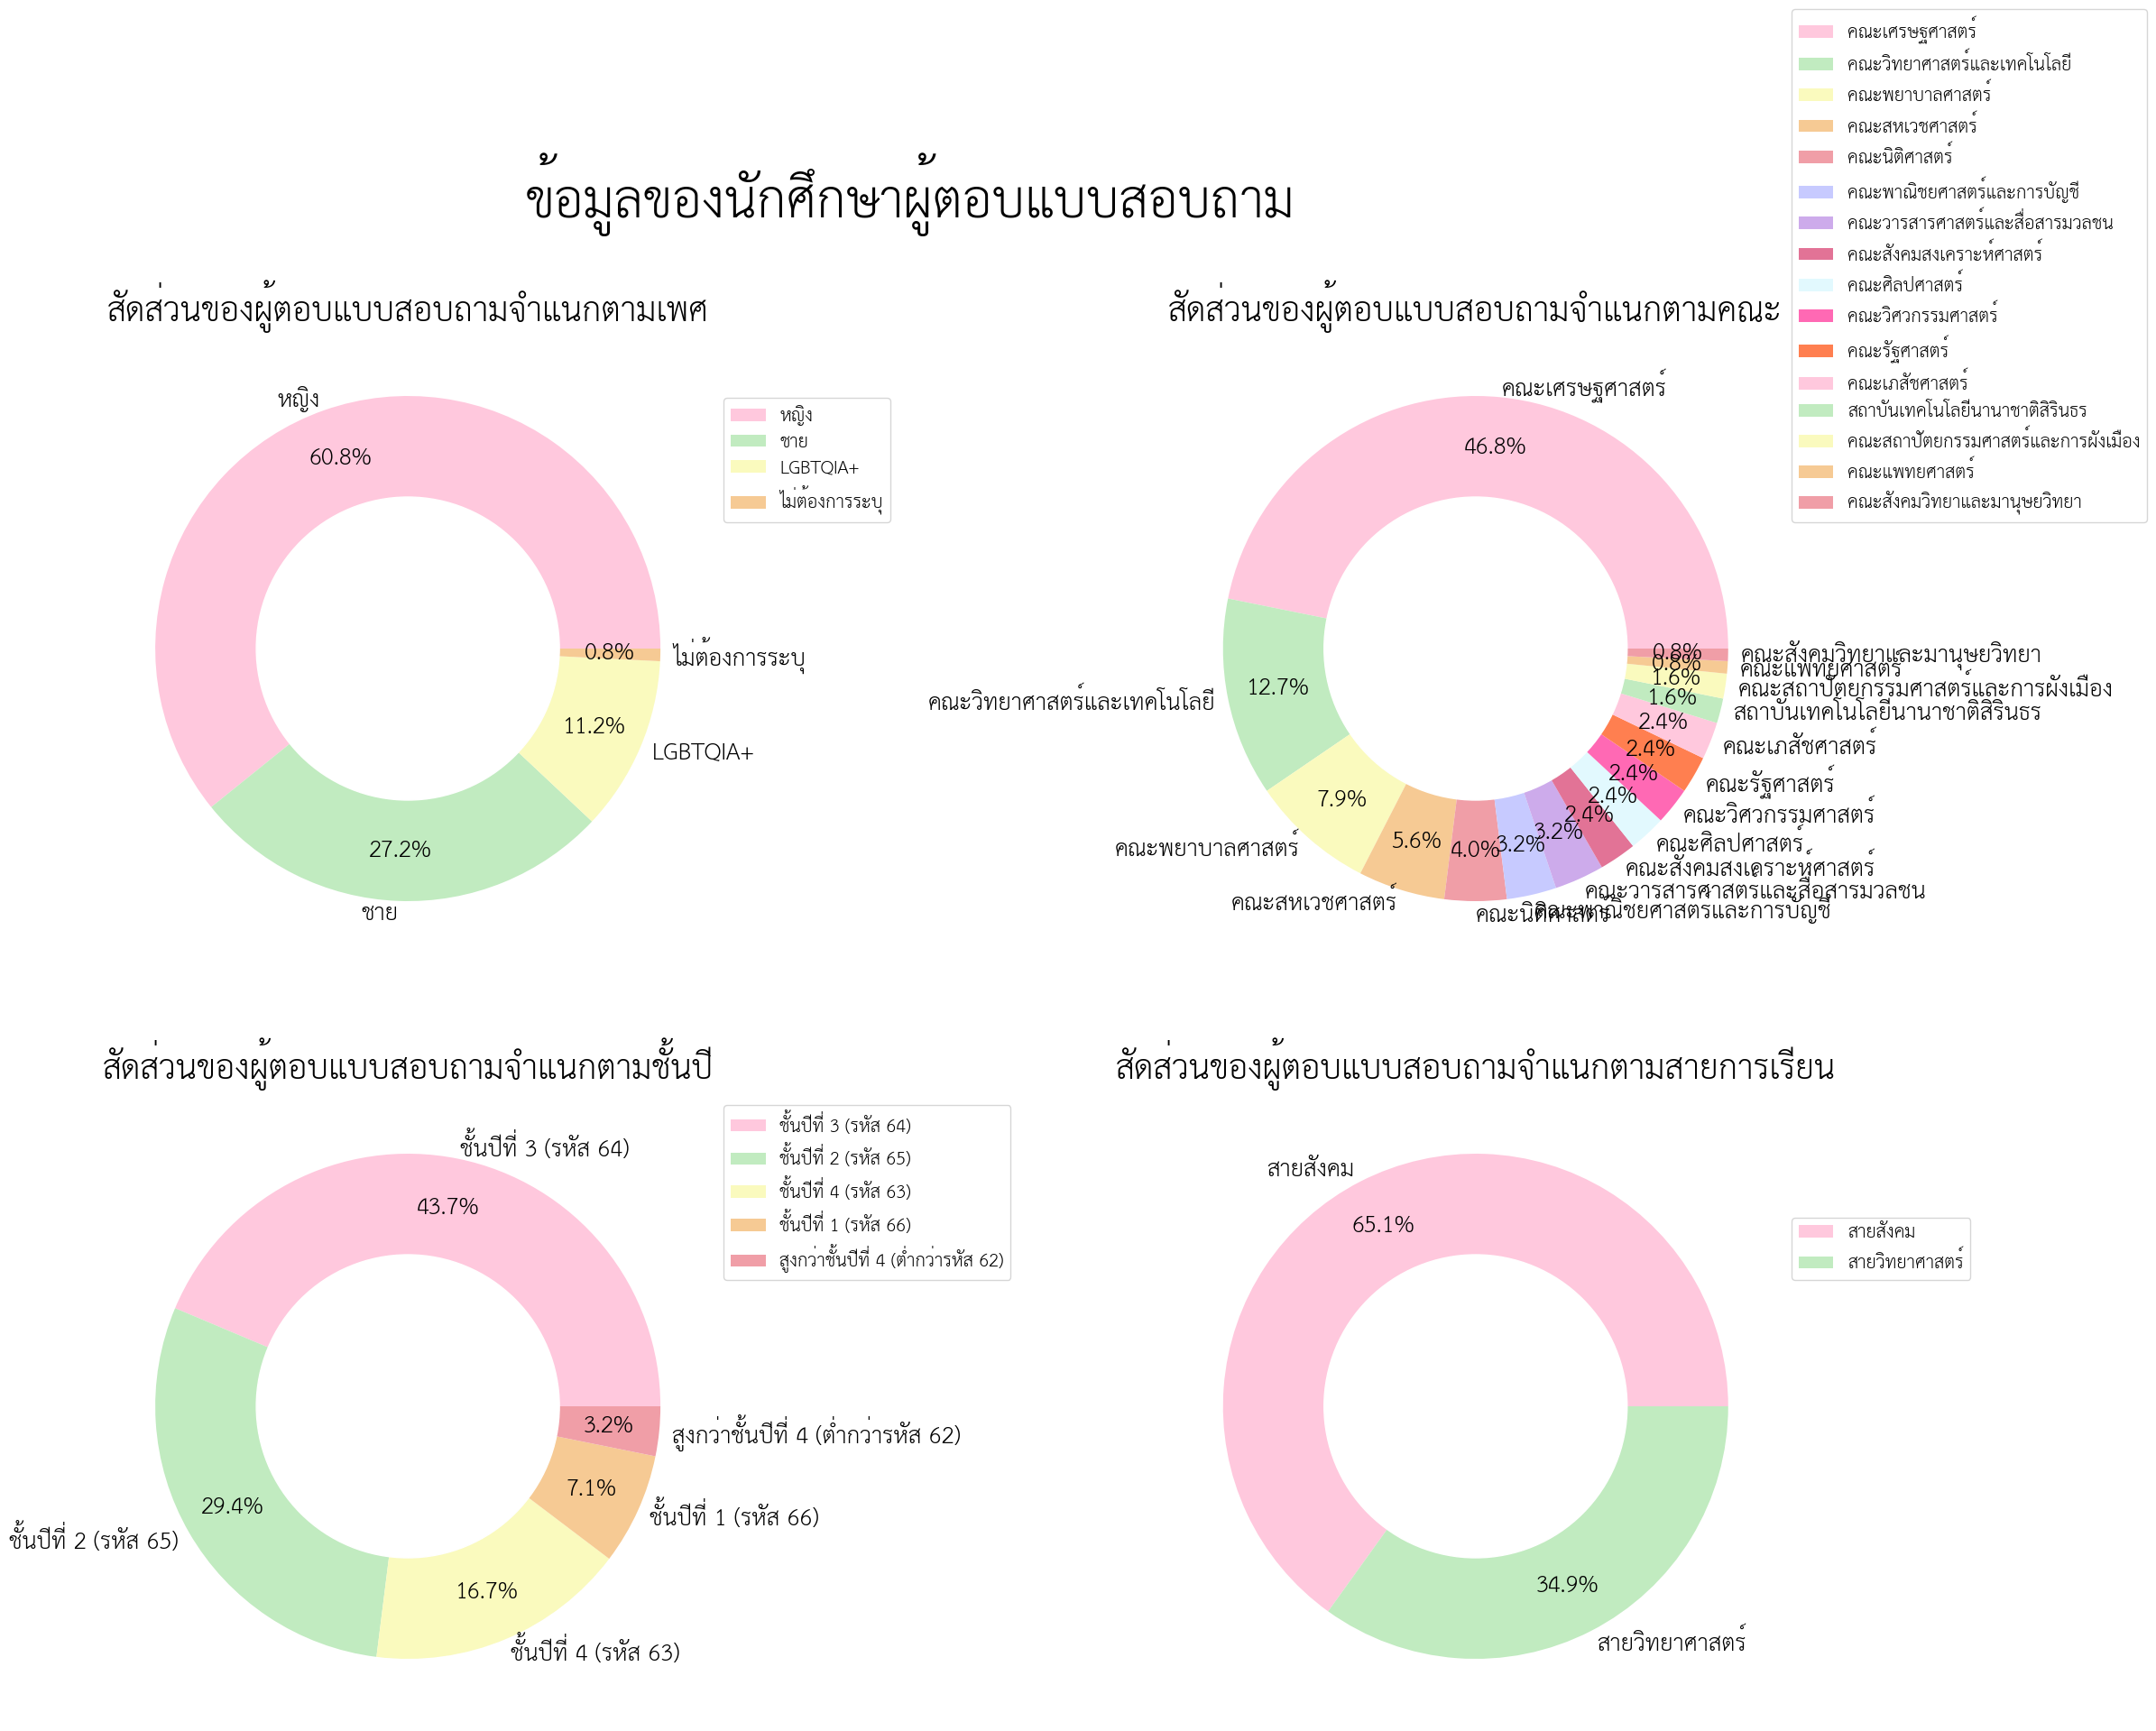

In [ ]:
figure = plt.figure(figsize = (28,20))
outer_c = ['#FFC8DD','#C1EBC0','#FAFABE', '#F6CA94', '#F09EA7', '#C7CAFF', '#CDABEB', '#e27396', '#e2f9fe', 'hotpink', 'coral']
plt.suptitle('ข้อมูลของนักศึกษาผู้ตอบแบบสอบถาม', fontsize = 40, weight = 'bold')


for i, col in enumerate(section1_col):
  sorted_count = df2[col].value_counts()

  #big circle
  plt.subplot(2, 2, i+1)
  plt.pie(sorted_count, labels = sorted_count.index, colors = outer_c, radius = 1,
          autopct = '%1.1f%%', labeldistance = 1.05, pctdistance = 0.8, textprops = {'fontsize': 18})
  plt.legend(loc = (1,0.7), fontsize = 14)

  #small circle
  small_circle = plt.Circle((0, 0), 0.6, color='white')
  plt.gca().add_artist(small_circle)

  #Title
  plt.title(f'สัดส่วนของผู้ตอบแบบสอบถามจำแนกตาม{col}', fontsize = 26, weight = 'bold', loc = 'center')


plt.show()

In [ ]:
df2

,ประทับเวลา,เพศ,ชั้นปี,คณะ,ด้านการศึกษา,ด้านอาหาร,ด้านความงาม,ด้านของจำเป็นส่วนตัว,ด้านค่าไฟฟ้า,ด้านการเดินทาง,...,ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา,สภาวะทางการเงิน,การวางแผนทางการเงิน,เงินออม,หนี้สิน,การลงทุน,4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์,4.7) ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ,หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต,สายการเรียน
0,2567/03/30 3:45:38 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,1,รายได้เท่ากับรายจ่าย,ไม่มี,ไม่มี,ไม่มี,ไม่มี,ค่อนข้างสูง เพราะราคาอาหารแม้แต่ในโรงอาหารของม...,ใช้จ่ายเงินไปกับอาหารเยอะมาก,NaN,สายวิทยาศาสตร์
1,2567/03/30 3:47:58 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 4 (รหัส 63),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,301 - 600,...,2,รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,ไม่มี,ค่าอาหารแพง,รายได้น้อยกว่ารายจ่าย,NaN,สายสังคม
2,2567/03/30 8:26:28 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"3,001 - 5,000","5,001 - 7,000","1,501 - 2,500","501 - 1,500",601 - 900,น้อยกว่าหรือเท่ากับ 300,...,3,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,มี,ค่าครองชีพต่อเดือนค่อนข้างใช้สูงหากเป็นค่าอาหา...,บางครั้งเกิดการใช้จ่ายกับอาหารการกินโดยใช่เรื่...,NaN,สายวิทยาศาสตร์
3,2567/03/30 8:33:26 หลังเที่ยง GMT+7,LGBTQIA+,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"1,001 - 3,000","3,001 - 5,000","501 - 1,500","501 - 1,500",น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 300,...,5,รายได้น้อยกว่ารายจ่าย,ไม่มี,ไม่มี,มี,ไม่มี,แพง เมื่อเทียบกับค่าครองชีพในกรุงเทพที่ราคาไม่...,รายได้น้อยกว่ารายจ่าย,NaN,สายวิทยาศาสตร์
4,2567/03/30 9:42:42 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะวิทยาศาสตร์และเทคโนโลยี,"น้อยกว่าหรือเท่ากับ 1,000","3,001 - 5,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,...,4,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,ไม่มี,ค่าครองชีพค่อนข้างแพงถ้าเทียบกับคุณภาพชีวิต,ค่าใช้จ่ายรายสัปดาห์ไม่พอใช้ ค่าอาหารแพง,NaN,สายวิทยาศาสตร์
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2567/04/13 9:58:39 หลังเที่ยง GMT+7,ไม่ต้องการระบุ,ชั้นปีที่ 2 (รหัส 65),คณะพยาบาลศาสตร์,"1,001 - 3,000","5,001 - 7,000","501 - 1,500","501 - 1,500","901 - 1,200",601 - 900,...,4,รายได้เท่ากับรายจ่าย,มี,มี,ไม่มี,ไม่มี,ค่าครองชีพแพงมากเมื่อเทียบกับคุณภาพความเป็นอยู...,ค่าอาหารแพง ความเจริญกระจุกอยู่ที่เชียงราก1 ทำ...,NaN,สายวิทยาศาสตร์
122,2567/04/13 10:21:37 หลังเที่ยง GMT+7,ชาย,ชั้นปีที่ 3 (รหัส 64),คณะวิทยาศาสตร์และเทคโนโลยี,"1,001 - 3,000","7,001 - 9,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,"901 - 1,200",301 - 600,...,3,รายได้มากกว่ารายจ่าย,ไม่มี,มี,ไม่มี,มี,โดยรวมอยู่ได้ แต่ค่าหอแพงเกินไป,ส่วนใหญ่หมดเงินไปกับของกิน,NaN,สายวิทยาศาสตร์
123,2567/04/13 11:08:13 หลังเที่ยง GMT+7,หญิง,ชั้นปีที่ 3 (รหัส 64),คณะเศรษฐศาสตร์,"1,001 - 3,000","9,001 - 11,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,"1,201 - 1,500","901 - 1,200",...,3,รายได้มากกว่ารายจ่าย,มี,มี,ไม่มี,ไม่มี,ราคาอาหารค่อนข้างสูง,ไม่มี,NaN,สายสังคม
124,2567/04/14 12:03:44 ก่อนเที่ยง GMT+7,หญิง,ชั้นปีที่ 2 (รหัส 65),คณะเศรษฐศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,601 - 900,น้อยกว่าหรือเท่ากับ 300,...,2,รายได้น้อยกว่ารายจ่าย,ไม่มี,มี,มี,ไม่มี,ค่อสข้างสูงมากๆ,ส่วนมากพบเจอค่าครองชีพแถวๆมอที่สูงมากๆ เช่นค่า...,-,สายสังคม


In [ ]:
df_field = df2[['สายการเรียน', 'คณะ']]
df_field

,สายการเรียน,คณะ
0,สายวิทยาศาสตร์,คณะวิทยาศาสตร์และเทคโนโลยี
1,สายสังคม,คณะเศรษฐศาสตร์
2,สายวิทยาศาสตร์,คณะวิทยาศาสตร์และเทคโนโลยี
3,สายวิทยาศาสตร์,คณะวิทยาศาสตร์และเทคโนโลยี
4,สายวิทยาศาสตร์,คณะวิทยาศาสตร์และเทคโนโลยี
...,...,...
121,สายวิทยาศาสตร์,คณะพยาบาลศาสตร์
122,สายวิทยาศาสตร์,คณะวิทยาศาสตร์และเทคโนโลยี
123,สายสังคม,คณะเศรษฐศาสตร์
124,สายสังคม,คณะเศรษฐศาสตร์


In [ ]:
df_field2 = df_field.groupby(['สายการเรียน', 'คณะ']).size()
df_field2

สายการเรียน     คณะ                               
สายวิทยาศาสตร์  คณะพยาบาลศาสตร์                       10
                คณะวิทยาศาสตร์และเทคโนโลยี            16
                คณะวิศวกรรมศาสตร์                      3
                คณะสถาปัตยกรรมศาสตร์และการผังเมือง     2
                คณะสหเวชศาสตร์                         7
                คณะเภสัชศาสตร์                         3
                คณะแพทยศาสตร์                          1
                สถาบันเทคโนโลยีนานาชาติสิรินธร         2
สายสังคม        คณะนิติศาสตร์                          5
                คณะพาณิชยศาสตร์และการบัญชี             4
                คณะรัฐศาสตร์                           3
                คณะวารสารศาสตร์และสื่อสารมวลชน         4
                คณะศิลปศาสตร์                          3
                คณะสังคมวิทยาและมานุษยวิทยา            1
                คณะสังคมสงเคราะห์ศาสตร์                3
                คณะเศรษฐศาสตร์                        59
dtype: int64

In [ ]:
df_field3  = pd.DataFrame(df_field2)
df_field3

0
สายการเรียน    คณะ                                   
สายวิทยาศาสตร์ คณะพยาบาลศาสตร์                     10
               คณะวิทยาศาสตร์และเทคโนโลยี          16
               คณะวิศวกรรมศาสตร์                    3
               คณะสถาปัตยกรรมศาสตร์และการผังเมือง   2
               คณะสหเวชศาสตร์                       7
               คณะเภสัชศาสตร์                       3
               คณะแพทยศาสตร์                        1
               สถาบันเทคโนโลยีนานาชาติสิรินธร       2
สายสังคม       คณะนิติศาสตร์                        5
               คณะพาณิชยศาสตร์และการบัญชี           4
               คณะรัฐศาสตร์                         3
               คณะวารสารศาสตร์และสื่อสารมวลชน       4
               คณะศิลปศาสตร์                        3
               คณะสังคมวิทยาและมานุษยวิทยา          1
               คณะสังคมสงเคราะห์ศาสตร์              3
               คณะเศรษฐศาสตร์                      59

In [ ]:
new_col = {0 : 'จำนวน'}
df_field3 = df_field3.rename(columns = new_col)
df_field3

จำนวน
สายการเรียน    คณะ                                      
สายวิทยาศาสตร์ คณะพยาบาลศาสตร์                        10
               คณะวิทยาศาสตร์และเทคโนโลยี             16
               คณะวิศวกรรมศาสตร์                       3
               คณะสถาปัตยกรรมศาสตร์และการผังเมือง      2
               คณะสหเวชศาสตร์                          7
               คณะเภสัชศาสตร์                          3
               คณะแพทยศาสตร์                           1
               สถาบันเทคโนโลยีนานาชาติสิรินธร          2
สายสังคม       คณะนิติศาสตร์                           5
               คณะพาณิชยศาสตร์และการบัญชี              4
               คณะรัฐศาสตร์                            3
               คณะวารสารศาสตร์และสื่อสารมวลชน          4
               คณะศิลปศาสตร์                           3
               คณะสังคมวิทยาและมานุษยวิทยา             1
               คณะสังคมสงเคราะห์ศาสตร์                 3
               คณะเศรษฐศาสตร์                         59

In [ ]:
df_field3.reset_index(inplace = True)
df_field3

,สายการเรียน,คณะ,จำนวน
0,สายวิทยาศาสตร์,คณะพยาบาลศาสตร์,10
1,สายวิทยาศาสตร์,คณะวิทยาศาสตร์และเทคโนโลยี,16
2,สายวิทยาศาสตร์,คณะวิศวกรรมศาสตร์,3
3,สายวิทยาศาสตร์,คณะสถาปัตยกรรมศาสตร์และการผังเมือง,2
4,สายวิทยาศาสตร์,คณะสหเวชศาสตร์,7
5,สายวิทยาศาสตร์,คณะเภสัชศาสตร์,3
6,สายวิทยาศาสตร์,คณะแพทยศาสตร์,1
7,สายวิทยาศาสตร์,สถาบันเทคโนโลยีนานาชาติสิรินธร,2
8,สายสังคม,คณะนิติศาสตร์,5
9,สายสังคม,คณะพาณิชยศาสตร์และการบัญชี,4


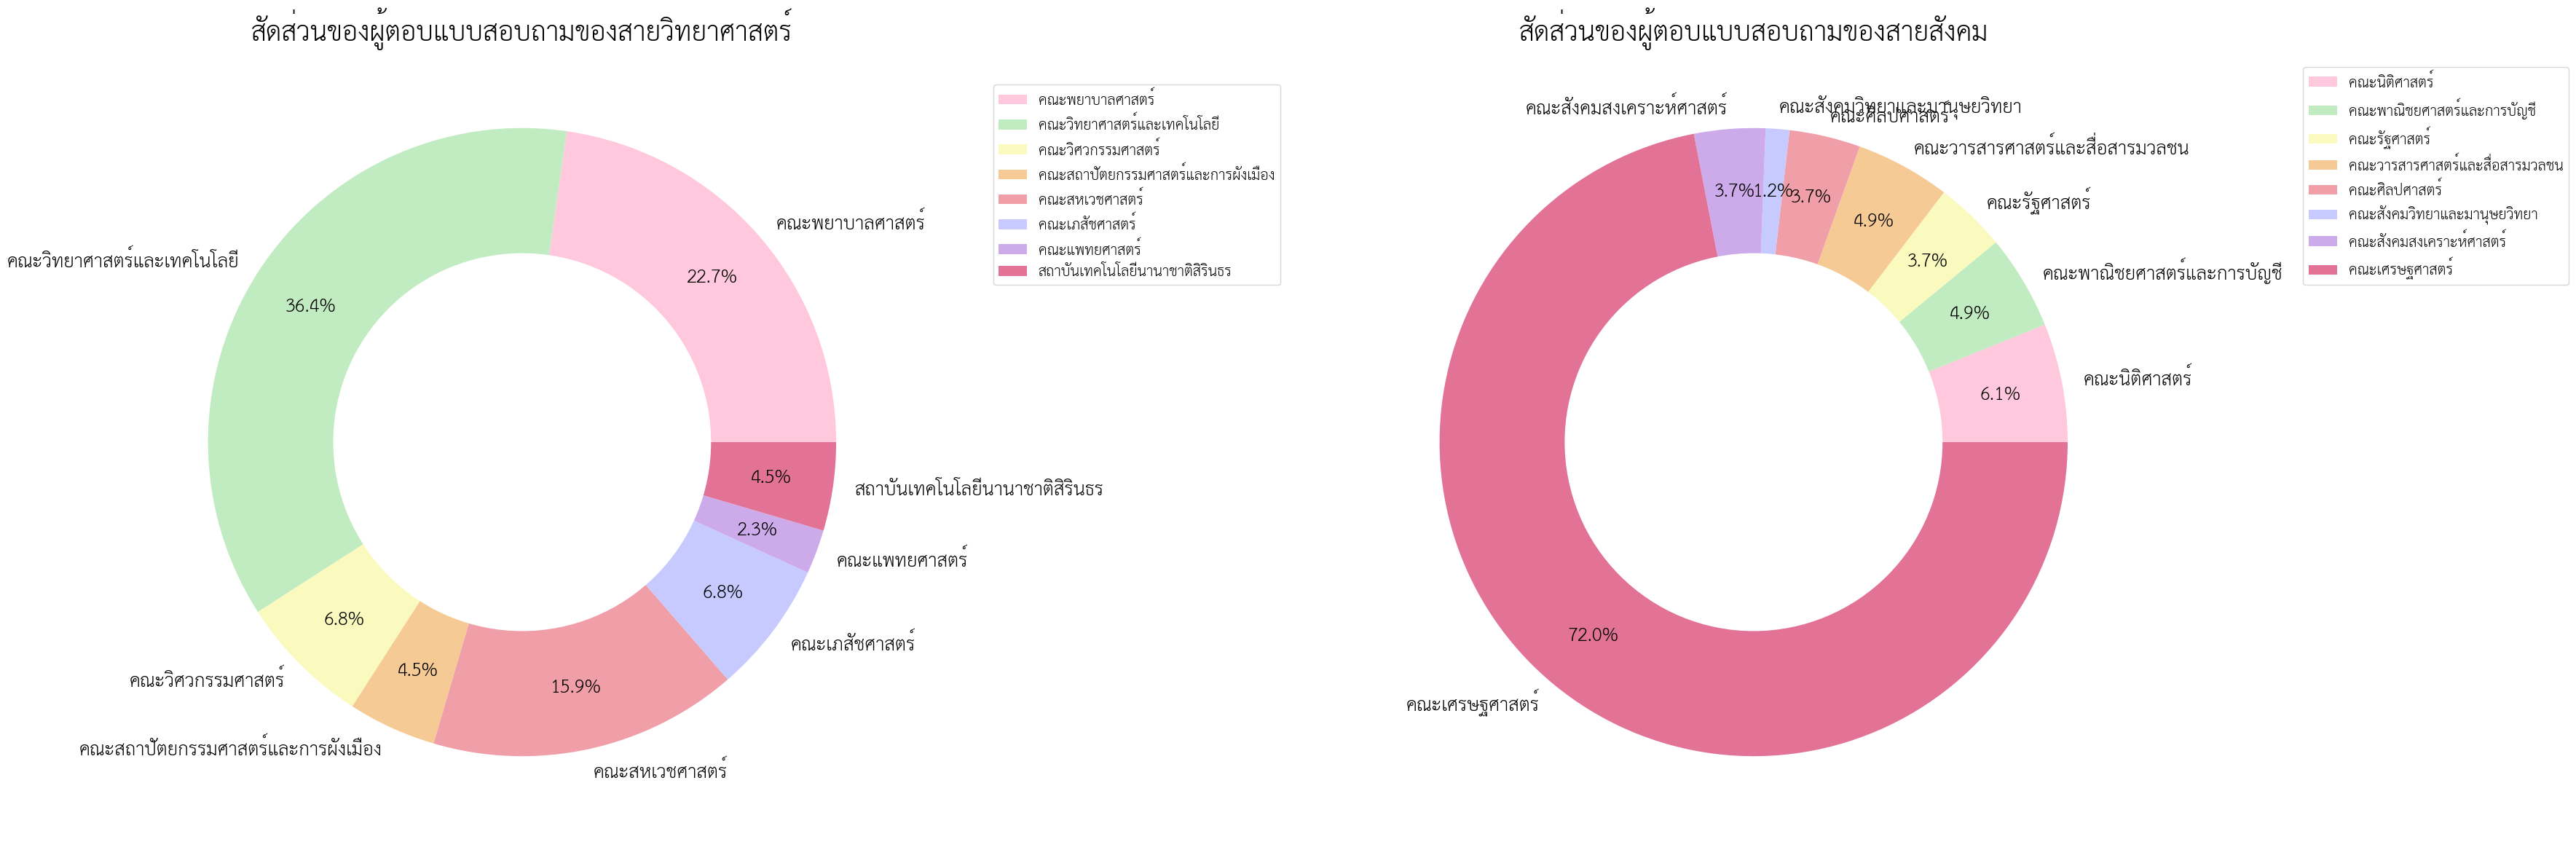

In [ ]:

#filter only Science field
df_field_sci = df_field3[df_field3['สายการเรียน'] == 'สายวิทยาศาสตร์']


sorted_count_sci = df_field_sci[['คณะ', 'จำนวน']]


#filter only Social field
df_field_social = df_field3[df_field3['สายการเรียน'] == 'สายสังคม']

##create visualization for Sci##

#big circle
figure = plt.figure(figsize = (40,14))

plt.subplot(1, 2, 1)
plt.title(f'สัดส่วนของผู้ตอบแบบสอบถามของสายวิทยาศาสตร์', fontsize = 26, weight = 'bold', loc = 'center')
plt.pie(df_field_sci['จำนวน'], labels = df_field_sci['คณะ'], colors = outer_c, radius = 1,
          autopct = '%1.1f%%', labeldistance = 1.07, pctdistance = 0.8, textprops = {'fontsize': 18})

plt.legend(loc = (1.1,0.7), fontsize = 14)

#small circle
small_circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(small_circle)

##create visualization for Social##
plt.subplot(1, 2, 2)
plt.title(f'สัดส่วนของผู้ตอบแบบสอบถามของสายสังคม', fontsize = 26, weight = 'bold', loc = 'center')
plt.pie(df_field_social['จำนวน'], labels = df_field_social['คณะ'], colors = outer_c, radius = 1,
          autopct = '%1.1f%%', labeldistance = 1.07, pctdistance = 0.8, textprops = {'fontsize': 18})

plt.legend(loc = (1.2,0.7), fontsize = 14)

#small circle
small_circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(small_circle)

plt.show()


# ส่วนที่ 2: ค่าใช้จ่ายของนักศึกษามหาวิทยาลัยธรรมศาสตร์



In [ ]:
df2.columns

Index(['ประทับเวลา', 'เพศ', 'ชั้นปี', 'คณะ', 'ด้านการศึกษา', 'ด้านอาหาร',
       'ด้านความงาม', 'ด้านของจำเป็นส่วนตัว', 'ด้านค่าไฟฟ้า', 'ด้านการเดินทาง',
       'ด้านความบันเทิง', 'ด้านสุขภาพ', 'ความพึงพอใจด้านราคาอาหาร',
       'ความพอใจด้านราคาที่พัก', 'ความพอใจด้านราคาค่าเดินทาง',
       'ความพอใจด้านค่าธรรมเนียมการศึกษา',
       'ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา', 'สภาวะทางการเงิน',
       'การวางแผนทางการเงิน', 'เงินออม', 'หนี้สิน', 'การลงทุน',
       '4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์',
       '4.7)  ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ',
       'หากสนใจ ผลการวิเคราะห์ของข้อมูลในภาพรวม ขอความร่วมมือระบุ Email ไว้และผู้จัดทำแบบสำรวจจะนำส่งข้อมูลในภาพรวมของผลการวิเคราะห์ให้ในอนาคต',
       'สายการเรียน'],
      dtype='object')

In [ ]:
df3 = df2[['สายการเรียน', 'ด้านการศึกษา', 'ด้านอาหาร','ด้านความงาม', 'ด้านของจำเป็นส่วนตัว', 'ด้านค่าไฟฟ้า', 'ด้านการเดินทาง',
       'ด้านความบันเทิง', 'ด้านสุขภาพ' ]]

df3.head()

,สายการเรียน,ด้านการศึกษา,ด้านอาหาร,ด้านความงาม,ด้านของจำเป็นส่วนตัว,ด้านค่าไฟฟ้า,ด้านการเดินทาง,ด้านความบันเทิง,ด้านสุขภาพ
0,สายวิทยาศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","5,001 - 7,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 500,น้อยกว่าหรือเท่ากับ 300
1,สายสังคม,"น้อยกว่าหรือเท่ากับ 1,000","9,001 - 11,000","501 - 1,500","501 - 1,500",601 - 900,301 - 600,น้อยกว่าหรือเท่ากับ 500,น้อยกว่าหรือเท่ากับ 300
2,สายวิทยาศาสตร์,"3,001 - 5,000","5,001 - 7,000","1,501 - 2,500","501 - 1,500",601 - 900,น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 500,"901 - 1,200"
3,สายวิทยาศาสตร์,"1,001 - 3,000","3,001 - 5,000","501 - 1,500","501 - 1,500",น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 500,น้อยกว่าหรือเท่ากับ 300
4,สายวิทยาศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000","3,001 - 5,000","501 - 1,500",น้อยกว่าหรือเท่ากับ 500,301 - 600,น้อยกว่าหรือเท่ากับ 300,น้อยกว่าหรือเท่ากับ 500,น้อยกว่าหรือเท่ากับ 300


In [ ]:
study_size = df3.groupby(['สายการเรียน']).size()
study_size

สายการเรียน
สายวิทยาศาสตร์    44
สายสังคม          82
dtype: int64

In [ ]:
study_dict = dict(study_size)
study_dict


{'สายวิทยาศาสตร์': 44, 'สายสังคม': 82}

In [ ]:
#เตรียมสำหรับการปรับสัดส่วน
#รวมของแต่ละสาย

a = study_dict['สายสังคม']
#print(type(a))
#check type: numpy.int64

social_count = int(a)

b = study_dict['สายวิทยาศาสตร์']
sci_count = int(b)



In [ ]:
sci_count

44

In [ ]:
social_count

82

## ด้านการศึกษา

In [ ]:
df_edu = df3[['สายการเรียน', 'ด้านการศึกษา']]
df_edu.head()

,สายการเรียน,ด้านการศึกษา
0,สายวิทยาศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000"
1,สายสังคม,"น้อยกว่าหรือเท่ากับ 1,000"
2,สายวิทยาศาสตร์,"3,001 - 5,000"
3,สายวิทยาศาสตร์,"1,001 - 3,000"
4,สายวิทยาศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000"


In [ ]:
df_edu2 = df_edu.groupby(['สายการเรียน', 'ด้านการศึกษา']).size()
df_edu2 =pd.DataFrame(df_edu2)
df_edu2

0
สายการเรียน    ด้านการศึกษา                 
สายวิทยาศาสตร์ 1,001 - 3,000              23
               3,001 - 5,000               8
               5,001 - 7,000               5
               7,001 - 9,000               4
               น้อยกว่าหรือเท่ากับ 1,000   4
สายสังคม       1,001 - 3,000              38
               3,001 - 5,000               9
               5,001 - 7,000               2
               7,001 - 9,000               5
               น้อยกว่าหรือเท่ากับ 1,000  22
               มากกว่า 9,000               6

In [ ]:
new_col = {'คณะ': 'คณะ', 'ด้านการศึกษา':'ด้านการศึกษา', 0 : 'จำนวน'}

df_edu2 = df_edu2.rename(columns = new_col)

df_edu2.reset_index(inplace = True)


In [ ]:
df_edu2

,สายการเรียน,ด้านการศึกษา,จำนวน
0,สายวิทยาศาสตร์,"1,001 - 3,000",23
1,สายวิทยาศาสตร์,"3,001 - 5,000",8
2,สายวิทยาศาสตร์,"5,001 - 7,000",5
3,สายวิทยาศาสตร์,"7,001 - 9,000",4
4,สายวิทยาศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000",4
5,สายสังคม,"1,001 - 3,000",38
6,สายสังคม,"3,001 - 5,000",9
7,สายสังคม,"5,001 - 7,000",2
8,สายสังคม,"7,001 - 9,000",5
9,สายสังคม,"น้อยกว่าหรือเท่ากับ 1,000",22


### ReAdjust the ratio

In [ ]:
edu_1 = df_edu2

#Sci
edu_sci = edu_1[edu_1['สายการเรียน'] == 'สายวิทยาศาสตร์']
sci_list = edu_sci['จำนวน'].tolist()

#Social
edu_social = edu_1[edu_1['สายการเรียน'] == 'สายสังคม']

social_list = edu_social['จำนวน'].tolist()



In [ ]:
#ปรับสัดส่วนของจำนวนนักศึกษาให้เป็นเปอร์เซ็น
#Sci
sci_ratio = []
for i in sci_list:
  sci_ratio.append(round((i*100)/sci_count,2))

#Social
social_ratio = []
for j in social_list:
  social_ratio.append(round((j*100)/social_count, 2))

print(sci_ratio)
print(social_ratio)

[52.27, 18.18, 11.36, 9.09, 9.09]
[46.34, 10.98, 2.44, 6.1, 26.83, 7.32]


In [ ]:
#รวม list
sci_ratio.extend(social_ratio)

#rename
all_list = sci_ratio
all_list

[52.27, 18.18, 11.36, 9.09, 9.09, 46.34, 10.98, 2.44, 6.1, 26.83, 7.32]

In [ ]:
#add new col to the existing dataframe
new_column_df = pd.DataFrame({'สัดส่วน': all_list})

df_edu3 = pd.concat([df_edu2, new_column_df], axis=1)
df_edu3

,สายการเรียน,ด้านการศึกษา,จำนวน,สัดส่วน
0,สายวิทยาศาสตร์,"1,001 - 3,000",23,52.27
1,สายวิทยาศาสตร์,"3,001 - 5,000",8,18.18
2,สายวิทยาศาสตร์,"5,001 - 7,000",5,11.36
3,สายวิทยาศาสตร์,"7,001 - 9,000",4,9.09
4,สายวิทยาศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000",4,9.09
5,สายสังคม,"1,001 - 3,000",38,46.34
6,สายสังคม,"3,001 - 5,000",9,10.98
7,สายสังคม,"5,001 - 7,000",2,2.44
8,สายสังคม,"7,001 - 9,000",5,6.10
9,สายสังคม,"น้อยกว่าหรือเท่ากับ 1,000",22,26.83


### Visualization


In [ ]:
df_edu0 = df_edu3
order = {'น้อยกว่าหรือเท่ากับ 1,000': 1, '1,001 - 3,000':2, '3,001 - 5,000':3, '5,001 - 7,000':4, '7,001 - 9,000':5, 'มากกว่า 9,000':6}
df_edu0['order'] = df_edu0['ด้านการศึกษา'].map(order)

df_edu0 = df_edu0.sort_values(by='order')
df_edu0

,สายการเรียน,ด้านการศึกษา,จำนวน,สัดส่วน,order
4,สายวิทยาศาสตร์,"น้อยกว่าหรือเท่ากับ 1,000",4,9.09,1
9,สายสังคม,"น้อยกว่าหรือเท่ากับ 1,000",22,26.83,1
0,สายวิทยาศาสตร์,"1,001 - 3,000",23,52.27,2
5,สายสังคม,"1,001 - 3,000",38,46.34,2
1,สายวิทยาศาสตร์,"3,001 - 5,000",8,18.18,3
6,สายสังคม,"3,001 - 5,000",9,10.98,3
2,สายวิทยาศาสตร์,"5,001 - 7,000",5,11.36,4
7,สายสังคม,"5,001 - 7,000",2,2.44,4
3,สายวิทยาศาสตร์,"7,001 - 9,000",4,9.09,5
8,สายสังคม,"7,001 - 9,000",5,6.10,5


In [ ]:
fig = px.bar(df_edu0, x = 'สัดส่วน', y = 'สายการเรียน', color = 'ด้านการศึกษา' , orientation = 'h',
             text = [f'{m}%' for m in df_edu0['สัดส่วน']], barmode = 'stack',
             color_discrete_sequence = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345'])


fig.update_layout(title = {'text': 'สัดส่วนค่าใช้จ่ายที่เกี่ยวข้องกับการศึกษาของนักศึกษามหาวิทยาลัยธรรมศาสตร์ จำแนกตามช่วงค่าใช้จ่าย'},
                  xaxis_title = 'เปอร์เซ็นต์ของนักศึกษา',
                  yaxis_title = 'สายการเรียน',
                  legend_title = 'ช่วงค่าใช้จ่ายด้านการศึกษา')

## ด้านอาหาร

In [ ]:
df_food = df3[['สายการเรียน', 'ด้านอาหาร']]
df_food.head()

,สายการเรียน,ด้านอาหาร
0,สายวิทยาศาสตร์,"5,001 - 7,000"
1,สายสังคม,"9,001 - 11,000"
2,สายวิทยาศาสตร์,"5,001 - 7,000"
3,สายวิทยาศาสตร์,"3,001 - 5,000"
4,สายวิทยาศาสตร์,"3,001 - 5,000"


In [ ]:
df_food2 = df_food.groupby(['สายการเรียน', 'ด้านอาหาร']).size()
df_food2 =pd.DataFrame(df_food2)
df_food2

0
สายการเรียน    ด้านอาหาร         
สายวิทยาศาสตร์ 3,001 - 5,000    5
               5,001 - 7,000   19
               7,001 - 9,000   17
               9,001 - 11,000   3
สายสังคม       3,001 - 5,000   18
               5,001 - 7,000   31
               7,001 - 9,000   17
               9,001 - 11,000  14
               มากกว่า 11,000   2

In [ ]:
new_col = {0 : 'จำนวน'}

df_food2 = df_food2.rename(columns = new_col)

df_food2.reset_index(inplace = True)

In [ ]:
df_food2

,สายการเรียน,ด้านอาหาร,จำนวน
0,สายวิทยาศาสตร์,"3,001 - 5,000",5
1,สายวิทยาศาสตร์,"5,001 - 7,000",19
2,สายวิทยาศาสตร์,"7,001 - 9,000",17
3,สายวิทยาศาสตร์,"9,001 - 11,000",3
4,สายสังคม,"3,001 - 5,000",18
5,สายสังคม,"5,001 - 7,000",31
6,สายสังคม,"7,001 - 9,000",17
7,สายสังคม,"9,001 - 11,000",14
8,สายสังคม,"มากกว่า 11,000",2


### ReAdjust the Ratio

In [ ]:
food_1 = df_food2

#Sci
food_sci = food_1[food_1['สายการเรียน'] == 'สายวิทยาศาสตร์']
sci_list = food_sci['จำนวน'].tolist()

#Social
food_social = food_1[food_1['สายการเรียน'] == 'สายสังคม']

social_list = food_social['จำนวน'].tolist()


In [ ]:
#ปรับสัดส่วนของจำนวนนักศึกษาให้เป็นเปอร์เซ็น
#Sci
sci_ratio = []
for i in sci_list:
  sci_ratio.append(round((i*100)/sci_count,2))

#Social
social_ratio = []
for j in social_list:
  social_ratio.append(round((j*100)/social_count, 2))

print(sci_ratio)
print(social_ratio)

[11.36, 43.18, 38.64, 6.82]
[21.95, 37.8, 20.73, 17.07, 2.44]


In [ ]:
#รวม list
sci_ratio.extend(social_ratio)

#rename
all_list = sci_ratio
all_list

[11.36, 43.18, 38.64, 6.82, 21.95, 37.8, 20.73, 17.07, 2.44]

In [ ]:
#add new col to the existing dataframe
new_column_df = pd.DataFrame({'สัดส่วน': all_list})

df_food3 = pd.concat([df_food2, new_column_df], axis=1)
df_food3

,สายการเรียน,ด้านอาหาร,จำนวน,สัดส่วน
0,สายวิทยาศาสตร์,"3,001 - 5,000",5,11.36
1,สายวิทยาศาสตร์,"5,001 - 7,000",19,43.18
2,สายวิทยาศาสตร์,"7,001 - 9,000",17,38.64
3,สายวิทยาศาสตร์,"9,001 - 11,000",3,6.82
4,สายสังคม,"3,001 - 5,000",18,21.95
5,สายสังคม,"5,001 - 7,000",31,37.80
6,สายสังคม,"7,001 - 9,000",17,20.73
7,สายสังคม,"9,001 - 11,000",14,17.07
8,สายสังคม,"มากกว่า 11,000",2,2.44


### Visualization

In [ ]:
df_f0 = df_food3
order = {'น้อยกว่าหรือเท่ากับ 3,000': 1, '3,001 - 5,000':2, '5,001 - 7,000':3, '7,001 - 9,000':4, '9,001 - 11,000':5, 'มากกว่า 11,000':6}
df_f0['order'] = df_f0['ด้านอาหาร'].map(order)

df_f0 = df_f0.sort_values(by='order')
df_f0

,สายการเรียน,ด้านอาหาร,จำนวน,สัดส่วน,order
0,สายวิทยาศาสตร์,"3,001 - 5,000",5,11.36,2
4,สายสังคม,"3,001 - 5,000",18,21.95,2
1,สายวิทยาศาสตร์,"5,001 - 7,000",19,43.18,3
5,สายสังคม,"5,001 - 7,000",31,37.80,3
2,สายวิทยาศาสตร์,"7,001 - 9,000",17,38.64,4
6,สายสังคม,"7,001 - 9,000",17,20.73,4
3,สายวิทยาศาสตร์,"9,001 - 11,000",3,6.82,5
7,สายสังคม,"9,001 - 11,000",14,17.07,5
8,สายสังคม,"มากกว่า 11,000",2,2.44,6


In [ ]:
fig = px.bar(df_f0, x = 'สัดส่วน', y = 'สายการเรียน', color = 'ด้านอาหาร' , orientation = 'h',
             text = [f'{m}%' for m in df_f0['สัดส่วน']], barmode = 'stack',
             color_discrete_sequence = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345'])


fig.update_layout(title = {'text': 'สัดส่วนค่าใช้จ่ายที่เกี่ยวข้องกับอาหารของนักศึกษามหาวิทยาลัยธรรมศาสตร์ จำแนกตามช่วงค่าใช้จ่าย'},
                  xaxis_title = 'เปอร์เซ็นต์ของนักศึกษา',
                  yaxis_title = 'สายการเรียน',
                  legend_title = 'ช่วงค่าใช้จ่ายด้านอาหาร')

## ด้านความสวยงาม

In [ ]:
df_bt = df3[['สายการเรียน', 'ด้านความงาม']]
df_bt.head()

,สายการเรียน,ด้านความงาม
0,สายวิทยาศาสตร์,"501 - 1,500"
1,สายสังคม,"501 - 1,500"
2,สายวิทยาศาสตร์,"1,501 - 2,500"
3,สายวิทยาศาสตร์,"501 - 1,500"
4,สายวิทยาศาสตร์,"501 - 1,500"


In [ ]:
df_bt2 = df_bt.groupby(['สายการเรียน', 'ด้านความงาม']).size()
df_bt2 =pd.DataFrame(df_bt2)
df_bt2

0
สายการเรียน    ด้านความงาม                
สายวิทยาศาสตร์ 1,501 - 2,500            17
               2,501 - 3,500             6
               3,501 - 4,500             1
               501 - 1,500              18
               น้อยกว่าหรือเท่ากับ 500   2
สายสังคม       1,501 - 2,500            16
               2,501 - 3,500            10
               3,501 - 4,500             4
               501 - 1,500              38
               น้อยกว่าหรือเท่ากับ 500  11
               มากกว่า 4,500             3

In [ ]:
new_col = {0 : 'จำนวน'}

df_bt2 = df_bt2.rename(columns = new_col)

df_bt2.reset_index(inplace = True)

In [ ]:
df_bt2

,สายการเรียน,ด้านความงาม,จำนวน
0,สายวิทยาศาสตร์,"1,501 - 2,500",17
1,สายวิทยาศาสตร์,"2,501 - 3,500",6
2,สายวิทยาศาสตร์,"3,501 - 4,500",1
3,สายวิทยาศาสตร์,"501 - 1,500",18
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,2
5,สายสังคม,"1,501 - 2,500",16
6,สายสังคม,"2,501 - 3,500",10
7,สายสังคม,"3,501 - 4,500",4
8,สายสังคม,"501 - 1,500",38
9,สายสังคม,น้อยกว่าหรือเท่ากับ 500,11


### ReAdjust the Ratio

In [ ]:
bt_1 = df_bt2

#Sci
bt_sci = bt_1[bt_1['สายการเรียน'] == 'สายวิทยาศาสตร์']
sci_list = bt_sci['จำนวน'].tolist()

#Social
bt_social = bt_1[bt_1['สายการเรียน'] == 'สายสังคม']

social_list = bt_social['จำนวน'].tolist()

In [ ]:
#ปรับสัดส่วนของจำนวนนักศึกษาให้เป็นเปอร์เซ็น
#Sci
sci_ratio = []
for i in sci_list:
  sci_ratio.append(round((i*100)/sci_count,2))

#Social
social_ratio = []
for j in social_list:
  social_ratio.append(round((j*100)/social_count, 2))

print(sci_ratio)
print(social_ratio)

[38.64, 13.64, 2.27, 40.91, 4.55]
[19.51, 12.2, 4.88, 46.34, 13.41, 3.66]


In [ ]:
#รวม list
sci_ratio.extend(social_ratio)

#rename
all_list = sci_ratio
all_list

[38.64, 13.64, 2.27, 40.91, 4.55, 19.51, 12.2, 4.88, 46.34, 13.41, 3.66]

In [ ]:
#add new col to the existing dataframe
new_column_df = pd.DataFrame({'สัดส่วน': all_list})

df_bt3 = pd.concat([df_bt2, new_column_df], axis=1)
df_bt3

,สายการเรียน,ด้านความงาม,จำนวน,สัดส่วน
0,สายวิทยาศาสตร์,"1,501 - 2,500",17,38.64
1,สายวิทยาศาสตร์,"2,501 - 3,500",6,13.64
2,สายวิทยาศาสตร์,"3,501 - 4,500",1,2.27
3,สายวิทยาศาสตร์,"501 - 1,500",18,40.91
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,2,4.55
5,สายสังคม,"1,501 - 2,500",16,19.51
6,สายสังคม,"2,501 - 3,500",10,12.20
7,สายสังคม,"3,501 - 4,500",4,4.88
8,สายสังคม,"501 - 1,500",38,46.34
9,สายสังคม,น้อยกว่าหรือเท่ากับ 500,11,13.41


### Visualization

In [ ]:
df_bt0 = df_bt3
order = {'น้อยกว่าหรือเท่ากับ 500': 1, '501 - 1,500':2, '1,501 - 2,500':3, '2,501 - 3,500':4, '3,501 - 4,500':5, 'มากกว่า 4,500':6}
df_bt0['order'] = df_bt0['ด้านความงาม'].map(order)

df_bt0 = df_bt0.sort_values(by='order')
df_bt0

,สายการเรียน,ด้านความงาม,จำนวน,สัดส่วน,order
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,2,4.55,1
9,สายสังคม,น้อยกว่าหรือเท่ากับ 500,11,13.41,1
3,สายวิทยาศาสตร์,"501 - 1,500",18,40.91,2
8,สายสังคม,"501 - 1,500",38,46.34,2
0,สายวิทยาศาสตร์,"1,501 - 2,500",17,38.64,3
5,สายสังคม,"1,501 - 2,500",16,19.51,3
1,สายวิทยาศาสตร์,"2,501 - 3,500",6,13.64,4
6,สายสังคม,"2,501 - 3,500",10,12.20,4
2,สายวิทยาศาสตร์,"3,501 - 4,500",1,2.27,5
7,สายสังคม,"3,501 - 4,500",4,4.88,5


In [ ]:
fig = px.bar(df_bt0, x = 'สัดส่วน', y = 'สายการเรียน', color = 'ด้านความงาม' , orientation = 'h',
             text = [f'{m}%' for m in df_bt0['สัดส่วน']], barmode = 'stack',
             color_discrete_sequence = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345'])


fig.update_layout(title = {'text': 'สัดส่วนค่าใช้จ่ายที่เกี่ยวข้องกับความงามของนักศึกษามหาวิทยาลัยธรรมศาสตร์ จำแนกตามช่วงค่าใช้จ่าย'},
                  xaxis_title = 'เปอร์เซ็นต์ของนักศึกษา',
                  yaxis_title = 'สายการเรียน',
                  legend_title = 'ช่วงค่าใช้จ่ายด้านความงาม')

## ด้านของใช้จำเป็น

In [ ]:
df_nec = df3[['สายการเรียน', 'ด้านของจำเป็นส่วนตัว']]
df_nec.head()

,สายการเรียน,ด้านของจำเป็นส่วนตัว
0,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500
1,สายสังคม,"501 - 1,500"
2,สายวิทยาศาสตร์,"501 - 1,500"
3,สายวิทยาศาสตร์,"501 - 1,500"
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500


In [ ]:
df_nec2 = df_nec.groupby(['สายการเรียน', 'ด้านของจำเป็นส่วนตัว']).size()
df_nec2 =pd.DataFrame(df_nec2)
df_nec2

0
สายการเรียน    ด้านของจำเป็นส่วนตัว       
สายวิทยาศาสตร์ 1,501 - 2,500             4
               2,501 - 3,500             2
               501 - 1,500              21
               น้อยกว่าหรือเท่ากับ 500  17
สายสังคม       1,501 - 2,500            10
               2,501 - 3,500             6
               3,501 - 4,500             1
               501 - 1,500              33
               น้อยกว่าหรือเท่ากับ 500  30
               มากกว่า 4,500             2

In [ ]:
new_col = {0 : 'จำนวน'}

df_nec2 = df_nec2.rename(columns = new_col)

df_nec2.reset_index(inplace = True)

df_nec2

,สายการเรียน,ด้านของจำเป็นส่วนตัว,จำนวน
0,สายวิทยาศาสตร์,"1,501 - 2,500",4
1,สายวิทยาศาสตร์,"2,501 - 3,500",2
2,สายวิทยาศาสตร์,"501 - 1,500",21
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,17
4,สายสังคม,"1,501 - 2,500",10
5,สายสังคม,"2,501 - 3,500",6
6,สายสังคม,"3,501 - 4,500",1
7,สายสังคม,"501 - 1,500",33
8,สายสังคม,น้อยกว่าหรือเท่ากับ 500,30
9,สายสังคม,"มากกว่า 4,500",2


### ReAdjust the Ratio

In [ ]:
nec_1 = df_nec2

#Sci
nec_sci = nec_1[nec_1['สายการเรียน'] == 'สายวิทยาศาสตร์']
sci_list = nec_sci['จำนวน'].tolist()

#Social
nec_social = nec_1[nec_1['สายการเรียน'] == 'สายสังคม']
social_list = nec_social['จำนวน'].tolist()

In [ ]:
#ปรับสัดส่วนของจำนวนนักศึกษาให้เป็นเปอร์เซ็น
#Sci
sci_ratio = []
for i in sci_list:
  sci_ratio.append(round((i*100)/sci_count,2))

#Social
social_ratio = []
for j in social_list:
  social_ratio.append(round((j*100)/social_count, 2))

print(sci_ratio)
print(social_ratio)

[9.09, 4.55, 47.73, 38.64]
[12.2, 7.32, 1.22, 40.24, 36.59, 2.44]


In [ ]:
#รวม list
sci_ratio.extend(social_ratio)

#rename
all_list = sci_ratio
all_list

[9.09, 4.55, 47.73, 38.64, 12.2, 7.32, 1.22, 40.24, 36.59, 2.44]

In [ ]:
#add new col to the existing dataframe
new_column_df = pd.DataFrame({'สัดส่วน': all_list})

df_nec3 = pd.concat([df_nec2, new_column_df], axis=1)
df_nec3

,สายการเรียน,ด้านของจำเป็นส่วนตัว,จำนวน,สัดส่วน
0,สายวิทยาศาสตร์,"1,501 - 2,500",4,9.09
1,สายวิทยาศาสตร์,"2,501 - 3,500",2,4.55
2,สายวิทยาศาสตร์,"501 - 1,500",21,47.73
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,17,38.64
4,สายสังคม,"1,501 - 2,500",10,12.20
5,สายสังคม,"2,501 - 3,500",6,7.32
6,สายสังคม,"3,501 - 4,500",1,1.22
7,สายสังคม,"501 - 1,500",33,40.24
8,สายสังคม,น้อยกว่าหรือเท่ากับ 500,30,36.59
9,สายสังคม,"มากกว่า 4,500",2,2.44


### Visualization

In [ ]:
df_nec0 = df_nec3
order = {'น้อยกว่าหรือเท่ากับ 500': 1, '501 - 1,500':2, '1,501 - 2,500':3, '2,501 - 3,500':4, '3,501 - 4,500':5, 'มากกว่า 4,500':6}
df_nec0['order'] = df_nec0['ด้านของจำเป็นส่วนตัว'].map(order)

df_nec0 = df_nec0.sort_values(by='order')
df_nec0

,สายการเรียน,ด้านของจำเป็นส่วนตัว,จำนวน,สัดส่วน,order
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,17,38.64,1
8,สายสังคม,น้อยกว่าหรือเท่ากับ 500,30,36.59,1
2,สายวิทยาศาสตร์,"501 - 1,500",21,47.73,2
7,สายสังคม,"501 - 1,500",33,40.24,2
0,สายวิทยาศาสตร์,"1,501 - 2,500",4,9.09,3
4,สายสังคม,"1,501 - 2,500",10,12.20,3
1,สายวิทยาศาสตร์,"2,501 - 3,500",2,4.55,4
5,สายสังคม,"2,501 - 3,500",6,7.32,4
6,สายสังคม,"3,501 - 4,500",1,1.22,5
9,สายสังคม,"มากกว่า 4,500",2,2.44,6


In [ ]:
fig = px.bar(df_nec0, x = 'สัดส่วน', y = 'สายการเรียน', color = 'ด้านของจำเป็นส่วนตัว' , orientation = 'h',
             text = [f'{m}%' for m in df_nec0['สัดส่วน']], barmode = 'stack',
             color_discrete_sequence = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345'])


fig.update_layout(title = {'text': 'สัดส่วนค่าใช้จ่ายที่เกี่ยวข้องกับด้านของจำเป็นส่วนตัวของนักศึกษามหาวิทยาลัยธรรมศาสตร์ จำแนกตามช่วงค่าใช้จ่าย'},
                  xaxis_title = 'เปอร์เซ็นต์ของนักศึกษา',
                  yaxis_title = 'สายการเรียน',
                  legend_title = 'ช่วงค่าใช้จ่ายด้านของจำเป็นส่วนตัว')

## ด้านค่าไฟฟ้า

In [ ]:
df_elec = df3[['สายการเรียน', 'ด้านค่าไฟฟ้า']]
df_elec.head()

,สายการเรียน,ด้านค่าไฟฟ้า
0,สายวิทยาศาสตร์,301 - 600
1,สายสังคม,601 - 900
2,สายวิทยาศาสตร์,601 - 900
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300
4,สายวิทยาศาสตร์,301 - 600


In [ ]:
df_elec2 = df_elec.groupby(['สายการเรียน', 'ด้านค่าไฟฟ้า']).size()
df_elec2 =pd.DataFrame(df_elec2)
df_elec2

0
สายการเรียน    ด้านค่าไฟฟ้า                           
สายวิทยาศาสตร์ 1,201 - 1,500                         3
               301 - 600                             6
               601 - 900                            10
               901 - 1,200                          17
               น้อยกว่าหรือเท่ากับ 300               1
               มากกว่า 1,500                         6
               ไม่ได้อยู่หอ (อาศัยอยู่กับครอบครัว)   1
สายสังคม       1,201 - 1,500                         9
               301 - 600                            23
               601 - 900                            23
               901 - 1,200                           9
               น้อยกว่าหรือเท่ากับ 300               5
               มากกว่า 1,500                         9
               ไม่ได้อยู่หอ (อาศัยอยู่กับครอบครัว)   4

In [ ]:
new_col = {0 : 'จำนวน'}

df_elec2 = df_elec2.rename(columns = new_col)

df_elec2.reset_index(inplace = True)

df_elec2

,สายการเรียน,ด้านค่าไฟฟ้า,จำนวน
0,สายวิทยาศาสตร์,"1,201 - 1,500",3
1,สายวิทยาศาสตร์,301 - 600,6
2,สายวิทยาศาสตร์,601 - 900,10
3,สายวิทยาศาสตร์,"901 - 1,200",17
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,1
5,สายวิทยาศาสตร์,"มากกว่า 1,500",6
6,สายวิทยาศาสตร์,ไม่ได้อยู่หอ (อาศัยอยู่กับครอบครัว),1
7,สายสังคม,"1,201 - 1,500",9
8,สายสังคม,301 - 600,23
9,สายสังคม,601 - 900,23


### ReAdjust the Ratio

In [ ]:
elec_1 = df_elec2

#Sci
elec_sci = elec_1[elec_1['สายการเรียน'] == 'สายวิทยาศาสตร์']
sci_list = elec_sci['จำนวน'].tolist()

#Social
elec_social = elec_1[elec_1['สายการเรียน'] == 'สายสังคม']
social_list = elec_social['จำนวน'].tolist()

In [ ]:
#ปรับสัดส่วนของจำนวนนักศึกษาให้เป็นเปอร์เซ็น
#Sci
sci_ratio = []
for i in sci_list:
  sci_ratio.append(round((i*100)/sci_count,2))

#Social
social_ratio = []
for j in social_list:
  social_ratio.append(round((j*100)/social_count, 2))

print(sci_ratio)
print(social_ratio)

[6.82, 13.64, 22.73, 38.64, 2.27, 13.64, 2.27]
[10.98, 28.05, 28.05, 10.98, 6.1, 10.98, 4.88]


In [ ]:
#รวม list
sci_ratio.extend(social_ratio)

#rename
all_list = sci_ratio
all_list

[6.82,
 13.64,
 22.73,
 38.64,
 2.27,
 13.64,
 2.27,
 10.98,
 28.05,
 28.05,
 10.98,
 6.1,
 10.98,
 4.88]

In [ ]:
#add new col to the existing dataframe
new_column_df = pd.DataFrame({'สัดส่วน': all_list})

df_elec3 = pd.concat([df_elec2, new_column_df], axis=1)
df_elec3

,สายการเรียน,ด้านค่าไฟฟ้า,จำนวน,สัดส่วน
0,สายวิทยาศาสตร์,"1,201 - 1,500",3,6.82
1,สายวิทยาศาสตร์,301 - 600,6,13.64
2,สายวิทยาศาสตร์,601 - 900,10,22.73
3,สายวิทยาศาสตร์,"901 - 1,200",17,38.64
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,1,2.27
5,สายวิทยาศาสตร์,"มากกว่า 1,500",6,13.64
6,สายวิทยาศาสตร์,ไม่ได้อยู่หอ (อาศัยอยู่กับครอบครัว),1,2.27
7,สายสังคม,"1,201 - 1,500",9,10.98
8,สายสังคม,301 - 600,23,28.05
9,สายสังคม,601 - 900,23,28.05


### Visualization

In [ ]:
df_elec0 = df_elec3
order = {'น้อยกว่าหรือเท่ากับ 300': 1, '301 - 600':2, '601 - 900':3, '901 - 1,200':4, '1,201 - 1,500':5, 'มากกว่า 1,500':6, 'ไม่ได้อยู่หอ (อาศัยอยู่กับครอบครัว)': 7}
df_elec0['order'] = df_elec0['ด้านค่าไฟฟ้า'].map(order)

df_elec0 = df_elec0.sort_values(by='order')
df_elec0

,สายการเรียน,ด้านค่าไฟฟ้า,จำนวน,สัดส่วน,order
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,1,2.27,1
11,สายสังคม,น้อยกว่าหรือเท่ากับ 300,5,6.10,1
1,สายวิทยาศาสตร์,301 - 600,6,13.64,2
8,สายสังคม,301 - 600,23,28.05,2
2,สายวิทยาศาสตร์,601 - 900,10,22.73,3
9,สายสังคม,601 - 900,23,28.05,3
3,สายวิทยาศาสตร์,"901 - 1,200",17,38.64,4
10,สายสังคม,"901 - 1,200",9,10.98,4
0,สายวิทยาศาสตร์,"1,201 - 1,500",3,6.82,5
7,สายสังคม,"1,201 - 1,500",9,10.98,5


In [ ]:
fig = px.bar(df_elec0, x = 'สัดส่วน', y = 'สายการเรียน', color = 'ด้านค่าไฟฟ้า' , orientation = 'h',
             text = [f'{m}%' for m in df_elec0['สัดส่วน']], barmode = 'stack',
             color_discrete_sequence = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345'])


fig.update_layout(title = {'text': 'สัดส่วนค่าใช้จ่ายที่เกี่ยวข้องกับด้านค่าไฟฟ้าของนักศึกษามหาวิทยาลัยธรรมศาสตร์ จำแนกตามช่วงค่าใช้จ่าย'},
                  xaxis_title = 'เปอร์เซ็นต์ของนักศึกษา',
                  yaxis_title = 'สายการเรียน',
                  legend_title = 'ช่วงค่าใช้จ่ายด้านค่าไฟฟ้า')

## ด้านการเดินทาง

In [ ]:
df_tp = df3[['สายการเรียน', 'ด้านการเดินทาง']]
df_tp.head()

,สายการเรียน,ด้านการเดินทาง
0,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300
1,สายสังคม,301 - 600
2,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300


In [ ]:
df_tp2 = df_tp.groupby(['สายการเรียน', 'ด้านการเดินทาง']).size()
df_tp2 =pd.DataFrame(df_tp2)
df_tp2

0
สายการเรียน    ด้านการเดินทาง             
สายวิทยาศาสตร์ 1,201 - 1,500             2
               301 - 600                24
               601 - 900                 6
               901 - 1,200               2
               น้อยกว่าหรือเท่ากับ 300   9
               มากกว่า 1,500             1
สายสังคม       1,201 - 1,500             6
               301 - 600                26
               601 - 900                14
               901 - 1,200              12
               น้อยกว่าหรือเท่ากับ 300  23
               มากกว่า 1,500             1

In [ ]:
new_col = {0 : 'จำนวน'}

df_tp2 = df_tp2.rename(columns = new_col)

df_tp2.reset_index(inplace = True)

df_tp2

,สายการเรียน,ด้านการเดินทาง,จำนวน
0,สายวิทยาศาสตร์,"1,201 - 1,500",2
1,สายวิทยาศาสตร์,301 - 600,24
2,สายวิทยาศาสตร์,601 - 900,6
3,สายวิทยาศาสตร์,"901 - 1,200",2
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,9
5,สายวิทยาศาสตร์,"มากกว่า 1,500",1
6,สายสังคม,"1,201 - 1,500",6
7,สายสังคม,301 - 600,26
8,สายสังคม,601 - 900,14
9,สายสังคม,"901 - 1,200",12


### ReAdjust the Ratio

In [ ]:
tp_1 = df_tp2

#Sci
tp_sci = tp_1[tp_1['สายการเรียน'] == 'สายวิทยาศาสตร์']
sci_list = tp_sci['จำนวน'].tolist()

#Social
tp_social = tp_1[tp_1['สายการเรียน'] == 'สายสังคม']
social_list = tp_social['จำนวน'].tolist()

In [ ]:
#ปรับสัดส่วนของจำนวนนักศึกษาให้เป็นเปอร์เซ็น
#Sci
sci_ratio = []
for i in sci_list:
  sci_ratio.append(round((i*100)/sci_count,2))

#Social
social_ratio = []
for j in social_list:
  social_ratio.append(round((j*100)/social_count, 2))

print(sci_ratio)
print(social_ratio)

[4.55, 54.55, 13.64, 4.55, 20.45, 2.27]
[7.32, 31.71, 17.07, 14.63, 28.05, 1.22]


In [ ]:
#รวม list
sci_ratio.extend(social_ratio)

#rename
all_list = sci_ratio
all_list

[4.55, 54.55, 13.64, 4.55, 20.45, 2.27, 7.32, 31.71, 17.07, 14.63, 28.05, 1.22]

In [ ]:
#add new col to the existing dataframe
new_column_df = pd.DataFrame({'สัดส่วน': all_list})

df_tp3 = pd.concat([df_tp2, new_column_df], axis=1)
df_tp3

,สายการเรียน,ด้านการเดินทาง,จำนวน,สัดส่วน
0,สายวิทยาศาสตร์,"1,201 - 1,500",2,4.55
1,สายวิทยาศาสตร์,301 - 600,24,54.55
2,สายวิทยาศาสตร์,601 - 900,6,13.64
3,สายวิทยาศาสตร์,"901 - 1,200",2,4.55
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,9,20.45
5,สายวิทยาศาสตร์,"มากกว่า 1,500",1,2.27
6,สายสังคม,"1,201 - 1,500",6,7.32
7,สายสังคม,301 - 600,26,31.71
8,สายสังคม,601 - 900,14,17.07
9,สายสังคม,"901 - 1,200",12,14.63


### Visualization

In [ ]:
df_tp4 = df_tp3
order = {'น้อยกว่าหรือเท่ากับ 300': 1, '301 - 600':2, '601 - 900':3, '901 - 1,200':4, '1,201 - 1,500':5, 'มากกว่า 1,500':6}
df_tp4['order'] = df_tp4['ด้านการเดินทาง'].map(order)

df_tp5 = df_tp4.sort_values(by='order')
df_tp5

,สายการเรียน,ด้านการเดินทาง,จำนวน,สัดส่วน,order
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,9,20.45,1
10,สายสังคม,น้อยกว่าหรือเท่ากับ 300,23,28.05,1
1,สายวิทยาศาสตร์,301 - 600,24,54.55,2
7,สายสังคม,301 - 600,26,31.71,2
2,สายวิทยาศาสตร์,601 - 900,6,13.64,3
8,สายสังคม,601 - 900,14,17.07,3
3,สายวิทยาศาสตร์,"901 - 1,200",2,4.55,4
9,สายสังคม,"901 - 1,200",12,14.63,4
0,สายวิทยาศาสตร์,"1,201 - 1,500",2,4.55,5
6,สายสังคม,"1,201 - 1,500",6,7.32,5


In [ ]:
fig = px.bar(df_tp5, x = 'สัดส่วน', y = 'สายการเรียน', color = 'ด้านการเดินทาง' , orientation = 'h',
             text = [f'{m}%' for m in df_tp5['สัดส่วน']], barmode = 'stack',
             color_discrete_sequence = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345'])


fig.update_layout(title = {'text': 'สัดส่วนค่าใช้จ่ายที่เกี่ยวข้องกับด้านการเดินทางของนักศึกษามหาวิทยาลัยธรรมศาสตร์ จำแนกตามช่วงค่าใช้จ่าย'},
                  xaxis_title = 'เปอร์เซ็นต์ของนักศึกษา',
                  yaxis_title = 'สายการเรียน',
                  legend_title = 'ช่วงค่าใช้จ่ายการเดินทาง')

## ด้านความบันเทิง

In [ ]:
df_ent = df3[['สายการเรียน', 'ด้านความบันเทิง']]
df_ent.head()

,สายการเรียน,ด้านความบันเทิง
0,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500
1,สายสังคม,น้อยกว่าหรือเท่ากับ 500
2,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500


In [ ]:
df_ent2 = df_ent.groupby(['สายการเรียน', 'ด้านความบันเทิง']).size()
df_ent2 =pd.DataFrame(df_ent2)
df_ent2

0
สายการเรียน    ด้านความบันเทิง            
สายวิทยาศาสตร์ 1,501 - 2,500             5
               2,501 - 3,500             3
               3,501 - 4,500             1
               501 - 1,500              17
               น้อยกว่าหรือเท่ากับ 500  18
สายสังคม       1,501 - 2,500            12
               2,501 - 3,500             4
               3,501 - 4,500             1
               501 - 1,500              31
               น้อยกว่าหรือเท่ากับ 500  28
               มากกว่า 4,500             6

In [ ]:
new_col = {0 : 'จำนวน'}

df_ent2 = df_ent2.rename(columns = new_col)

df_ent2.reset_index(inplace = True)

df_ent2

,สายการเรียน,ด้านความบันเทิง,จำนวน
0,สายวิทยาศาสตร์,"1,501 - 2,500",5
1,สายวิทยาศาสตร์,"2,501 - 3,500",3
2,สายวิทยาศาสตร์,"3,501 - 4,500",1
3,สายวิทยาศาสตร์,"501 - 1,500",17
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,18
5,สายสังคม,"1,501 - 2,500",12
6,สายสังคม,"2,501 - 3,500",4
7,สายสังคม,"3,501 - 4,500",1
8,สายสังคม,"501 - 1,500",31
9,สายสังคม,น้อยกว่าหรือเท่ากับ 500,28


### ReAdjust the Ratio

In [ ]:
ent_1 = df_ent2

#Sci
ent_sci = ent_1[ent_1['สายการเรียน'] == 'สายวิทยาศาสตร์']
sci_list = ent_sci['จำนวน'].tolist()

#Social
ent_social = ent_1[ent_1['สายการเรียน'] == 'สายสังคม']
social_list = ent_social['จำนวน'].tolist()

In [ ]:
#ปรับสัดส่วนของจำนวนนักศึกษาให้เป็นเปอร์เซ็น
#Sci
sci_ratio = []
for i in sci_list:
  sci_ratio.append(round((i*100)/sci_count,2))

#Social
social_ratio = []
for j in social_list:
  social_ratio.append(round((j*100)/social_count, 2))

print(sci_ratio)
print(social_ratio)

[11.36, 6.82, 2.27, 38.64, 40.91]
[14.63, 4.88, 1.22, 37.8, 34.15, 7.32]


In [ ]:
#รวม list
sci_ratio.extend(social_ratio)

#rename
all_list = sci_ratio
all_list

[11.36, 6.82, 2.27, 38.64, 40.91, 14.63, 4.88, 1.22, 37.8, 34.15, 7.32]

In [ ]:
#add new col to the existing dataframe
new_column_df = pd.DataFrame({'สัดส่วน': all_list})

df_ent3 = pd.concat([df_ent2, new_column_df], axis=1)
df_ent3

,สายการเรียน,ด้านความบันเทิง,จำนวน,สัดส่วน
0,สายวิทยาศาสตร์,"1,501 - 2,500",5,11.36
1,สายวิทยาศาสตร์,"2,501 - 3,500",3,6.82
2,สายวิทยาศาสตร์,"3,501 - 4,500",1,2.27
3,สายวิทยาศาสตร์,"501 - 1,500",17,38.64
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,18,40.91
5,สายสังคม,"1,501 - 2,500",12,14.63
6,สายสังคม,"2,501 - 3,500",4,4.88
7,สายสังคม,"3,501 - 4,500",1,1.22
8,สายสังคม,"501 - 1,500",31,37.80
9,สายสังคม,น้อยกว่าหรือเท่ากับ 500,28,34.15


### Visualization

In [ ]:
df_ent4 = df_ent3
order = {'น้อยกว่าหรือเท่ากับ 500': 1, '501 - 1,500':2, '1,501 - 2,500':3, '2,501 - 3,500':4, '3,501 - 4,500':5, 'มากกว่า 4,500':6}
df_ent4['order'] = df_ent4['ด้านความบันเทิง'].map(order)

df_ent5 = df_ent4.sort_values(by='order')
df_ent5

,สายการเรียน,ด้านความบันเทิง,จำนวน,สัดส่วน,order
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 500,18,40.91,1
9,สายสังคม,น้อยกว่าหรือเท่ากับ 500,28,34.15,1
3,สายวิทยาศาสตร์,"501 - 1,500",17,38.64,2
8,สายสังคม,"501 - 1,500",31,37.80,2
0,สายวิทยาศาสตร์,"1,501 - 2,500",5,11.36,3
5,สายสังคม,"1,501 - 2,500",12,14.63,3
1,สายวิทยาศาสตร์,"2,501 - 3,500",3,6.82,4
6,สายสังคม,"2,501 - 3,500",4,4.88,4
2,สายวิทยาศาสตร์,"3,501 - 4,500",1,2.27,5
7,สายสังคม,"3,501 - 4,500",1,1.22,5


In [ ]:
fig = px.bar(df_ent5, x = 'สัดส่วน', y = 'สายการเรียน', color = 'ด้านความบันเทิง' , orientation = 'h',
             text = [f'{m}%' for m in df_ent5['สัดส่วน']], barmode = 'stack',
             color_discrete_sequence = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345'])


fig.update_layout(title = {'text': 'สัดส่วนค่าใช้จ่ายที่เกี่ยวข้องกับด้านความบันเทิงของนักศึกษามหาวิทยาลัยธรรมศาสตร์ จำแนกตามช่วงค่าใช้จ่าย'},
                  xaxis_title = 'เปอร์เซ็นต์ของนักศึกษา',
                  yaxis_title = 'สายการเรียน',
                  legend_title = 'ช่วงค่าใช้จ่ายด้านความบันเทิง')

## ด้านสุขภาพ

In [ ]:
df_h = df3[['สายการเรียน', 'ด้านสุขภาพ']]
df_h.head()

,สายการเรียน,ด้านสุขภาพ
0,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300
1,สายสังคม,น้อยกว่าหรือเท่ากับ 300
2,สายวิทยาศาสตร์,"901 - 1,200"
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300
4,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300


In [ ]:
df_h2 = df_h.groupby(['สายการเรียน', 'ด้านสุขภาพ']).size()
df_h2 =pd.DataFrame(df_h2)
df_h2

0
สายการเรียน    ด้านสุขภาพ                 
สายวิทยาศาสตร์ 301 - 600                 5
               601 - 900                 3
               901 - 1,200               2
               น้อยกว่าหรือเท่ากับ 300  34
สายสังคม       1,201 - 1,500             1
               301 - 600                14
               601 - 900                 3
               901 - 1,200               1
               น้อยกว่าหรือเท่ากับ 300  61
               มากกว่า 1,500             2

In [ ]:
new_col = {0 : 'จำนวน'}

df_h2 = df_h2.rename(columns = new_col)

df_h2.reset_index(inplace = True)

df_h2

,สายการเรียน,ด้านสุขภาพ,จำนวน
0,สายวิทยาศาสตร์,301 - 600,5
1,สายวิทยาศาสตร์,601 - 900,3
2,สายวิทยาศาสตร์,"901 - 1,200",2
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,34
4,สายสังคม,"1,201 - 1,500",1
5,สายสังคม,301 - 600,14
6,สายสังคม,601 - 900,3
7,สายสังคม,"901 - 1,200",1
8,สายสังคม,น้อยกว่าหรือเท่ากับ 300,61
9,สายสังคม,"มากกว่า 1,500",2


### ReAdjust the Ratio

In [ ]:
h_1 = df_h2

#Sci
h_sci = h_1[h_1['สายการเรียน'] == 'สายวิทยาศาสตร์']
sci_list = h_sci['จำนวน'].tolist()

#Social
h_social = h_1[h_1['สายการเรียน'] == 'สายสังคม']
social_list = h_social['จำนวน'].tolist()

In [ ]:
#ปรับสัดส่วนของจำนวนนักศึกษาให้เป็นเปอร์เซ็น
#Sci
sci_ratio = []
for i in sci_list:
  sci_ratio.append(round((i*100)/sci_count,2))

#Social
social_ratio = []
for j in social_list:
  social_ratio.append(round((j*100)/social_count, 2))

print(sci_ratio)
print(social_ratio)

[11.36, 6.82, 4.55, 77.27]
[1.22, 17.07, 3.66, 1.22, 74.39, 2.44]


In [ ]:
#รวม list
sci_ratio.extend(social_ratio)

#rename
all_list = sci_ratio
all_list

[11.36, 6.82, 4.55, 77.27, 1.22, 17.07, 3.66, 1.22, 74.39, 2.44]

In [ ]:
#add new col to the existing dataframe
new_column_df = pd.DataFrame({'สัดส่วน': all_list})

df_h3 = pd.concat([df_h2, new_column_df], axis=1)
df_h3

,สายการเรียน,ด้านสุขภาพ,จำนวน,สัดส่วน
0,สายวิทยาศาสตร์,301 - 600,5,11.36
1,สายวิทยาศาสตร์,601 - 900,3,6.82
2,สายวิทยาศาสตร์,"901 - 1,200",2,4.55
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,34,77.27
4,สายสังคม,"1,201 - 1,500",1,1.22
5,สายสังคม,301 - 600,14,17.07
6,สายสังคม,601 - 900,3,3.66
7,สายสังคม,"901 - 1,200",1,1.22
8,สายสังคม,น้อยกว่าหรือเท่ากับ 300,61,74.39
9,สายสังคม,"มากกว่า 1,500",2,2.44


### Visualization

In [ ]:
df_h0 = df_h3
order = {'น้อยกว่าหรือเท่ากับ 300': 1, '301 - 600':2, '601 - 900':3, '901 - 1,200':4, '1,201 - 1,500':5, 'มากกว่า 1,500':6}
df_h0['order'] = df_h0['ด้านสุขภาพ'].map(order)

df_h0 = df_h0.sort_values(by='order')
df_h0

,สายการเรียน,ด้านสุขภาพ,จำนวน,สัดส่วน,order
3,สายวิทยาศาสตร์,น้อยกว่าหรือเท่ากับ 300,34,77.27,1
8,สายสังคม,น้อยกว่าหรือเท่ากับ 300,61,74.39,1
0,สายวิทยาศาสตร์,301 - 600,5,11.36,2
5,สายสังคม,301 - 600,14,17.07,2
1,สายวิทยาศาสตร์,601 - 900,3,6.82,3
6,สายสังคม,601 - 900,3,3.66,3
2,สายวิทยาศาสตร์,"901 - 1,200",2,4.55,4
7,สายสังคม,"901 - 1,200",1,1.22,4
4,สายสังคม,"1,201 - 1,500",1,1.22,5
9,สายสังคม,"มากกว่า 1,500",2,2.44,6


In [ ]:
fig = px.bar(df_h0, x = 'สัดส่วน', y = 'สายการเรียน', color = 'ด้านสุขภาพ' , orientation = 'h',
             text = [f'{m}%' for m in df_h0['สัดส่วน']], barmode = 'stack',
             color_discrete_sequence = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345'])


fig.update_layout(title = {'text': 'สัดส่วนค่าใช้จ่ายที่เกี่ยวข้องกับด้านสุขภาพของนักศึกษามหาวิทยาลัยธรรมศาสตร์ จำแนกตามช่วงค่าใช้จ่าย'},
                  xaxis_title = 'เปอร์เซ็นต์ของนักศึกษา',
                  yaxis_title = 'สายการเรียน',
                  legend_title = 'ช่วงค่าใช้จ่ายด้านสุขภาพ')

## Overall Part2

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
color = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65', '#0B5345']


edu_c = {'น้อยกว่าหรือเท่ากับ 1,000': '#D0ECE7', '1,001 - 3,000':'#A2D9CE', '3,001 - 5,000':'#73C6B6',
         '5,001 - 7,000':'#16A085', '7,001 - 9,000':'#117A65', 'มากกว่า 9,000':'#0B5345'}

food_c = {'น้อยกว่าหรือเท่ากับ 3,000': '#D0ECE7', '3,001 - 5,000':'#A2D9CE', '5,001 - 7,000':'#73C6B6',
          '7,001 - 9,000':'#16A085', '9,001 - 11,000':'#117A65', 'มากกว่า 11,000':'#0B5345'}

beauty_c  = {'น้อยกว่าหรือเท่ากับ 500': '#D0ECE7', '501 - 1,500':'#A2D9CE', '1,501 - 2,500':'#73C6B6',
             '2,501 - 3,500':'#16A085', '3,501 - 4,500':'#117A65', 'มากกว่า 4,500':'#0B5345'}

nec_c = {'น้อยกว่าหรือเท่ากับ 500': '#D0ECE7', '501 - 1,500':'#A2D9CE', '1,501 - 2,500':'#73C6B6',
             '2,501 - 3,500':'#16A085', '3,501 - 4,500':'#117A65', 'มากกว่า 4,500':'#0B5345'}


elec_c= {'น้อยกว่าหรือเท่ากับ 300': '#D0ECE7', '301 - 600':'#A2D9CE', '601 - 900':'#73C6B6',
         '901 - 1,200':'#16A085', '1,201 - 1,500':'#117A65', 'มากกว่า 1,500':'#0B5345', 'ไม่ได้อยู่หอ (อาศัยอยู่กับครอบครัว)': '#000000'}

transport_c = {'น้อยกว่าหรือเท่ากับ 300': '#D0ECE7', '301 - 600':'#A2D9CE', '601 - 900':'#73C6B6',
         '901 - 1,200':'#16A085', '1,201 - 1,500':'#117A65', 'มากกว่า 1,500':'#0B5345'}

ent_c = {'น้อยกว่าหรือเท่ากับ 500': '#D0ECE7', '501 - 1,500':'#A2D9CE', '1,501 - 2,500':'#73C6B6',
             '2,501 - 3,500':'#16A085', '3,501 - 4,500':'#117A65', 'มากกว่า 4,500':'#0B5345'}

health_c = {'น้อยกว่าหรือเท่ากับ 300': '#D0ECE7', '301 - 600':'#A2D9CE', '601 - 900':'#73C6B6',
         '901 - 1,200':'#16A085', '1,201 - 1,500':'#117A65', 'มากกว่า 1,500':'#0B5345'}

In [ ]:

fig = make_subplots(rows=2, cols=4, subplot_titles=('ด้านการศึกษา', 'ด้านอาหาร', 'ด้านความงาม',
                                                    'ด้านของใช้จำเป็น', 'ด้านค่าไฟฟ้า', 'ด้านการเดินทาง', 'ด้านความบันเทิง',
                                                    'ด้านสุขภาพ'))

# Education
fig.add_trace(
    go.Bar(x=df_edu0['สายการเรียน'], y = df_edu0['สัดส่วน'], orientation = 'v', text = [f'{m}%' for m in df_edu0['สัดส่วน']],
           textfont = dict(size=10),
           marker = dict(color=df_edu0['ด้านการศึกษา'].map(edu_c)), name='ด้านการศึกษา'),
    row=1, col=1)

# Food
fig.add_trace(
    go.Bar(x=df_f0['สายการเรียน'], y=df_f0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_f0['สัดส่วน']],
           textfont=dict(size=10),
           marker=dict(color=df_f0['ด้านอาหาร'].map(food_c)), name='ด้านอาหาร'),
    row=1, col=2)

#Beauty
fig.add_trace(
    go.Bar(x = df_bt0['สายการเรียน'], y = df_bt0['สัดส่วน'], orientation = 'v', text=[f'{m}%' for m in df_bt0['สัดส่วน']],
           textfont = dict(size=10),
           marker = dict(color = df_bt0['ด้านความงาม'].map(beauty_c)), name = 'ด้านความงาม'),
    row=1, col=3)

#neccessary
fig.add_trace(
    go.Bar(x = df_nec0['สายการเรียน'], y = df_nec0['สัดส่วน'], orientation = 'v', text = [f'{m}%' for m in df_nec0['สัดส่วน']],
           textfont = dict(size=10),
           marker=dict(color=df_nec0['ด้านของจำเป็นส่วนตัว'].map(nec_c)), name='ด้านของใช้จำเป็น'),
    row=1, col=4)

#Electricity
fig.add_trace(
    go.Bar(x=df_elec0['สายการเรียน'], y=df_elec0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_elec0['สัดส่วน']],
           textfont=dict(size=10),
           marker = dict(color=df_elec0['ด้านค่าไฟฟ้า'].map(elec_c)), name='ด้านค่าไฟฟ้า'),
    row=2, col=1)

#Transportation
fig.add_trace(
    go.Bar(x=df_tp5['สายการเรียน'], y=df_tp5['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_tp5['สัดส่วน']],
           textfont = dict(size=8),
           marker = dict(color=df_tp5['ด้านการเดินทาง'].map(transport_c)), name='ด้านการเดินทาง'),
    row=2, col=2)

#Entertainment
fig.add_trace(
    go.Bar(x=df_ent5['สายการเรียน'], y=df_ent5['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_ent5['สัดส่วน']],
           textfont=dict(size=8),
           marker = dict(color=df_ent5['ด้านความบันเทิง'].map(ent_c)), name='ด้านความบันเทิง'),
    row=2, col=3)

#health
fig.add_trace(
    go.Bar(x=df_h0['สายการเรียน'], y=df_h0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_h0['สัดส่วน']],
           textfont=dict(size=8),
           marker= dict(color=df_h0['ด้านสุขภาพ'].map(health_c)), name='ด้านสุขภาพ'),
    row=2, col=4)


#layout
fig.update_layout(title="ค่าใช้จ่ายของนักศึกษาแบ่งตามประเภทต่างๆ",
                  xaxis_title="สายการเรียน",
                  yaxis_title="สัดส่วนของนักศึกษา",
                  height = 850,
                  width = 1000,
                  showlegend=False,
                  title_x = 0.5,
                  title_y = 0.95)








#ส่วนที่ 3: ความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์

##3.1) ด้านราคาอาหาร

In [ ]:
# จัดกลุ่มและนับจำนวน
stack_3_1 = fin_part3_df.groupby(["ความพึงพอใจด้านราคาอาหาร", "สายการเรียน"])["สายการเรียน"].count().reset_index(name="count")

# สร้างกราฟแท่ง
fig_3_1 = px.bar(stack_3_1, x="ความพึงพอใจด้านราคาอาหาร", y="count", color="สายการเรียน",
               text=[f"{100*count/len(fin_part3_df):.2f}%" for count in stack_3_1['count']], barmode='stack', color_discrete_sequence=['#D0ECE7', '#73C6B6'])

# ปรับแต่งตัวกราฟ
fig_3_1.update_traces(texttemplate="%{y} (%{text})", textposition="inside")

fig_3_1.update_layout(
    title={
        'text': "ระดับความพึงพอใจด้านราคาอาหาร",
        'x': 0.5
    },
    font_family='TH Sarabun New',
    xaxis_title="ระดับ",
    yaxis_title="ความถี่ (คน)",
    height=700,
    width=700,
    legend_title="สายการเรียน"
)

# แสดงกราฟ
fig_3_1.show()

##3.2) ด้านราคาที่พัก

In [ ]:
# จัดกลุ่มและนับจำนวน
stack_3_2 = fin_part3_df.groupby(["ความพอใจด้านราคาที่พัก", "สายการเรียน"])["สายการเรียน"].count().reset_index(name="count")

# สร้างกราฟแท่ง
fig_3_2 = px.bar(stack_3_2, x="ความพอใจด้านราคาที่พัก", y="count", color="สายการเรียน",
               text=[f"{100*count/len(fin_part3_df):.2f}%" for count in stack_3_2['count']], barmode='stack', color_discrete_sequence=['#D0ECE7', '#73C6B6'])

# ปรับแต่งตัวกราฟ
fig_3_2.update_traces(texttemplate="%{y} (%{text})", textposition="inside")

fig_3_2.update_layout(
    title={
        'text': "ระดับความพึงพอใจด้านราคาที่พัก",
        'x': 0.5
    },
    font_family='TH Sarabun New',
    xaxis_title="ระดับ",
    yaxis_title="ความถี่ (คน)",
    height=700,
    width=700,
    legend_title="สายการเรียน"
)

# แสดงกราฟ
fig_3_2.show()

##3.3) ด้านราคาค่าเดินทาง

In [ ]:
# จัดกลุ่มและนับจำนวน
stack_3_3 = fin_part3_df.groupby(["ความพอใจด้านราคาค่าเดินทาง", "สายการเรียน"])["สายการเรียน"].count().reset_index(name="count")

# สร้างกราฟแท่ง
fig_3_3 = px.bar(stack_3_3, x="ความพอใจด้านราคาค่าเดินทาง", y="count", color="สายการเรียน",
               text=[f"{100*count/len(fin_part3_df):.2f}%" for count in stack_3_3['count']], barmode='stack', color_discrete_sequence=['#D0ECE7', '#73C6B6'])

# ปรับแต่งตัวกราฟ
fig_3_3.update_traces(texttemplate="%{y} (%{text})", textposition="inside")

fig_3_3.update_layout(
    title={
        'text': "ระดับความพึงพอใจด้านราคาค่าเดินทาง",
        'x': 0.5
    },
    font_family='TH Sarabun New',
    xaxis_title="ระดับ",
    yaxis_title="ความถี่ (คน)",
    height=700,
    width=700,
    legend_title="สายการเรียน"
)

# แสดงกราฟ
fig_3_3.show()

##3.4) ด้านค่าธรรมเนียมการศึกษา

In [ ]:
# จัดกลุ่มและนับจำนวน
stack_3_4 = fin_part3_df.groupby(["ความพอใจด้านค่าธรรมเนียมการศึกษา", "สายการเรียน"])["สายการเรียน"].count().reset_index(name="count")

# สร้างกราฟแท่ง
fig_3_4 = px.bar(stack_3_4, x="ความพอใจด้านค่าธรรมเนียมการศึกษา", y="count", color="สายการเรียน",
               text=[f"{100*count/len(fin_part3_df):.2f}%" for count in stack_3_4['count']], barmode='stack', color_discrete_sequence=['#D0ECE7', '#73C6B6'])

# ปรับแต่งตัวกราฟ
fig_3_4.update_traces(texttemplate="%{y} (%{text})", textposition="inside")

fig_3_4.update_layout(
    title={
        'text': "ระดับความพึงพอใจด้านค่าธรรมเนียมการศึกษา",
        'x': 0.5
    },
    font_family='TH Sarabun New',
    xaxis_title="ระดับ",
    yaxis_title="ความถี่ (คน)",
    height=700,
    width=700,
    legend_title="สายการเรียน"
)

# แสดงกราฟ
fig_3_4.show()

##3.5) ด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา

In [ ]:
# จัดกลุ่มและนับจำนวน
stack_3_5 = fin_part3_df.groupby(["ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา", "สายการเรียน"])["สายการเรียน"].count().reset_index(name="count")

# สร้างกราฟแท่ง
fig_3_5 = px.bar(stack_3_5, x="ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา", y="count", color="สายการเรียน",
               text=[f"{100*count/len(fin_part3_df):.2f}%" for count in stack_3_5['count']], barmode='stack', color_discrete_sequence=['#D0ECE7', '#73C6B6'])

# ปรับแต่งตัวกราฟ
fig_3_5.update_traces(texttemplate="%{y} (%{text})", textposition="inside")

fig_3_5.update_layout(
    title={
        'text': "ระดับความพึงพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา",
        'x': 0.5
    },
    font_family='TH Sarabun New',
    xaxis_title="ระดับ",
    yaxis_title="ความถี่ (คน)",
    height=700,
    width=700,
    legend_title="สายการเรียน"
)

# แสดงกราฟ
fig_3_5.show()

##Overall Part3

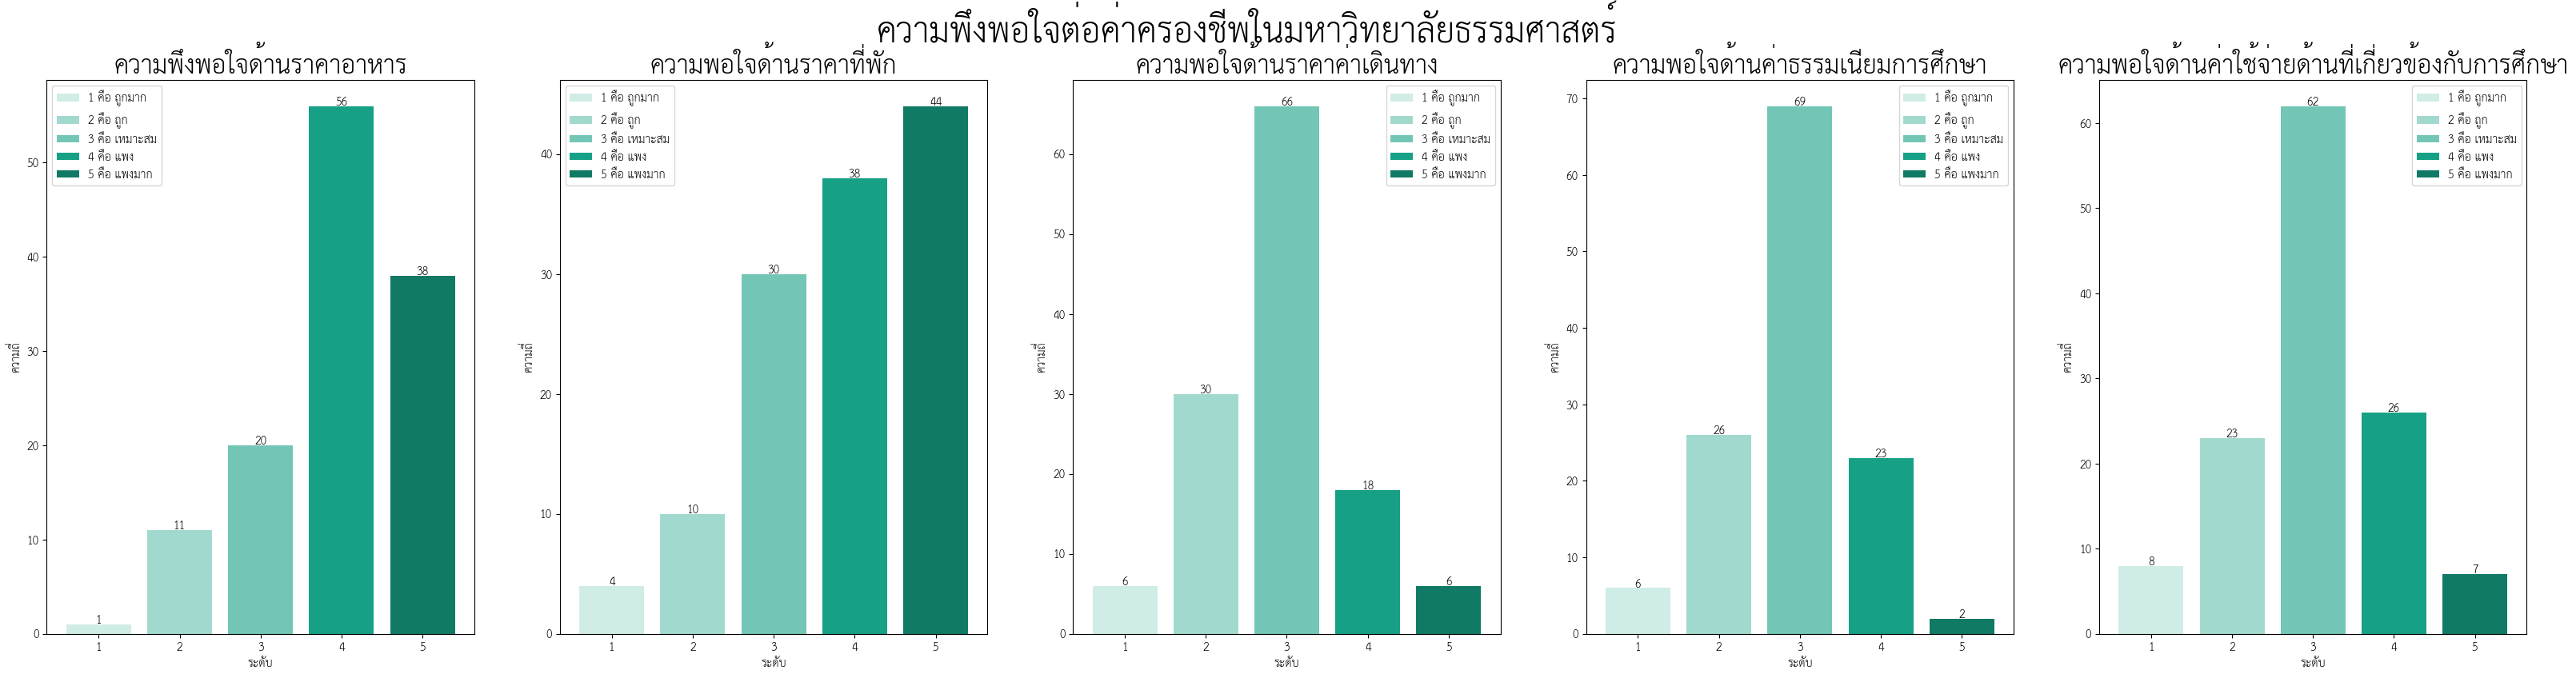

In [ ]:
#Bar Chart แสดงภาพรวมคำตอบของข้อ 3.1 - 3.5
all_part3 = ['ความพึงพอใจด้านราคาอาหาร', 'ความพอใจด้านราคาที่พัก', 'ความพอใจด้านราคาค่าเดินทาง','ความพอใจด้านค่าธรรมเนียมการศึกษา','ความพอใจด้านค่าใช้จ่ายด้านที่เกี่ยวข้องกับการศึกษา']
categ_num = ['1','2','3','4','5']

figure = plt.figure(figsize = (40,9))
outer_colors = color
plt.suptitle('ความพึงพอใจต่อค่าครองชีพในมหาวิทยาลัยธรรมศาสตร์', fontsize = 30, weight = 'bold')

for i, col in enumerate(all_part3):
  sorted_count_part3 = fin_df[col].value_counts().sort_index()

  plt.subplot(1, 5, i+1)
  plt.bar(categ_num,
           sorted_count_part3,
           label = ['1 คือ ถูกมาก', '2 คือ ถูก', '3 คือ เหมาะสม', '4 คือ แพง', '5 คือ แพงมาก'],
           align = 'center',
           color = ['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65']
           )
  for i, count in enumerate(sorted_count_part3):
      plt.text(i, count + 0.1, str(count), ha='center')
  plt.title(f'{col}', fontsize = 22, weight = 'bold', loc = 'center')
  plt.xlabel('ระดับ')
  plt.ylabel('ความถี่')
  plt.legend()

In [ ]:
#Scatter Plot ค่าเฉลี่ยคะแนนของข้อที่ 3.1 - 3.5
part3_df['x'] = [random.uniform(0, 1) for i in range(len(part3_df))]
part3_df['y'] = [random.uniform(0, 1) for i in range(len(part3_df))]
fig = px.scatter(part3_df, x='ความพึงพอใจ', y='y', size='ขนาด', color=['#D0ECE7', '#A2D9CE', '#73C6B6', '#16A085', '#117A65'],
                 text='ค่าเฉลี่ยคะแนน', hover_name='ความพึงพอใจ',
                 hover_data={'x': False, 'y': False, 'ขนาด': False},
                 size_max=105, title='ค่าเฉลี่ยระดับความพึงพอใจในราคาด้านต่าง ๆ <br> 1 คือ ถูกมาก, 2 คือ ถูก, 3 คือ เหมาะสม, 4 คือ แพง, 5 คือ แพงมาก ',
                 labels={'ความพึงพอใจ': 'ระดับความพึงพอใจ', 'ค่าเฉลี่ยคะแนน': 'ค่าเฉลี่ยคะแนน'})
fig.update_traces(textposition='middle center')
fig.update_layout(legend_title_text='ความพึงพอใจ',showlegend=False,width=800, plot_bgcolor='white')
fig.update_layout(title_x=0.5)

fig.update_xaxes(title_text='ความพึงพอใจ')
fig.update_yaxes(showticklabels=False)
fig.show()

#ส่วนที่ 4: พฤติกรรมทางการเงินของนักศึกษา

##4.1) สภาวะทางการเงิน

In [ ]:
#ภาพรวม Donut Chart ข้อที่ 4.1
import plotly.graph_objects as go
status_money = fin_df.groupby( 'สภาวะทางการเงิน')
status_mm = status_money.size().values
status_mmm = status_money.size().index
target = 1
factor = status_money.get_group(status_mmm[target])
factor = factor['สภาวะทางการเงิน'].str.get_dummies(";").sum()
 # pie chart parameters
sm_val = status_mm
sm_labels = status_mmm

colorsq=[ '#117A65','#73C6B6','#D0ECE7']
pull = [0, 0, 0, 0, 0, 0, 0, 0]
pull[target] = 0.2
fig = [
    go.Figure(go.Pie(
        labels=sm_labels,
        values=sm_val,
        texttemplate="%{label}: %{value} (%{percent})",
        textposition="outside",
        hole=0.4,
        pull=pull
    ))
 ]
for i in fig:
  i.update_layout(
 #   font_family=fontname,
    height=500, width=700
  )
fig[0].update_layout(title="สภาวะทางการเงินของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
                     colorway=colorsq,
                     legend=dict(
                         title="สภาวะทางการเงิน",
                         orientation="v"
                     ))
fig[0].show()

Text(0.5, 1.0, 'นักศึกษามีสภาวะทางการเงินเป็นอย่างไร')

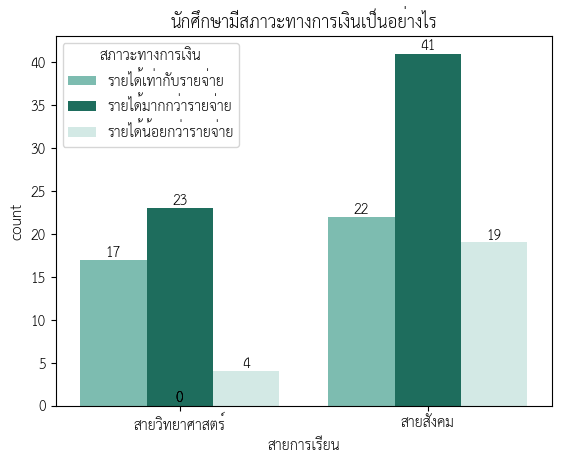

In [ ]:
#Bar Chart รายละเอียดเปรียบเทียบระหว่างคณะสายสังคมกับคณะสายวิทยาศาสตร์ ข้อที่ 4.1
sns.countplot(x = 'สายการเรียน', hue = 'สภาวะทางการเงิน', data = fin_df, palette=[ '#73C6B6','#117A65','#D0ECE7'])

for p in plt.gca().patches:
    count = int(round(p.get_height()))
    plt.gca().annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('นักศึกษามีสภาวะทางการเงินเป็นอย่างไร')

##4.2) การวางแผนทางการเงิน

Text(0.5, 1.0, 'นักศึกษามีการวางแผนทางการเงินหรือไม่')

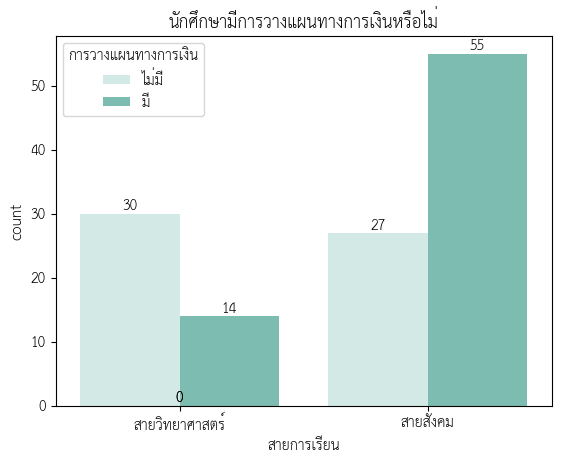

In [ ]:
#Bar Chart รายละเอียดเปรียบเทียบระหว่างคณะสายสังคมกับคณะสายวิทยาศาสตร์ ข้อที่ 4.2
sns.countplot(x = 'สายการเรียน', hue = 'การวางแผนทางการเงิน', data = fin_df, palette=['#D0ECE7','#73C6B6'])

for p in plt.gca().patches:
    count = int(round(p.get_height()))
    plt.gca().annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('นักศึกษามีการวางแผนทางการเงินหรือไม่')

##4.3) เงินออม

Text(0.5, 1.0, 'นักศึกษามีเงินออมหรือไม่')

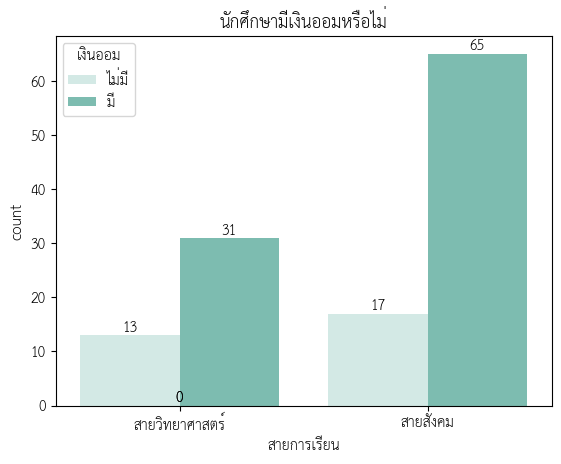

In [ ]:
#Bar Chart รายละเอียดเปรียบเทียบระหว่างคณะสายสังคมกับคณะสายวิทยาศาสตร์ ข้อที่ 4.3
sns.countplot(x = 'สายการเรียน', hue = 'เงินออม', data = fin_df, palette=['#D0ECE7','#73C6B6'])

for p in plt.gca().patches:
    count = int(round(p.get_height()))
    plt.gca().annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('นักศึกษามีเงินออมหรือไม่')

##4.4) หนี้สิน

Text(0.5, 1.0, 'นักศึกษามีหนี้สินหรือไม่')

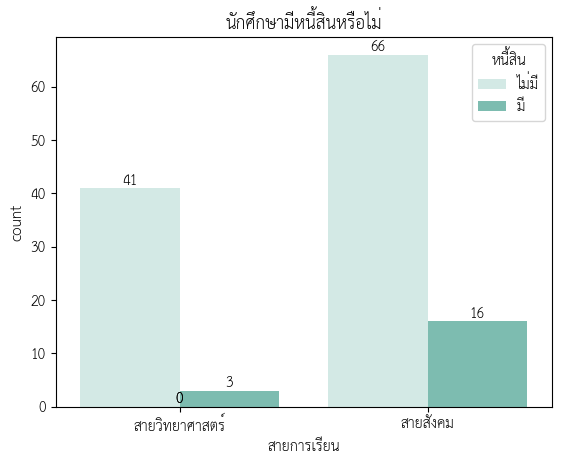

In [ ]:
#Bar Chart รายละเอียดเปรียบเทียบระหว่างคณะสายสังคมกับคณะสายวิทยาศาสตร์ ข้อที่ 4.4
sns.countplot(x = 'สายการเรียน', hue = 'หนี้สิน', data = fin_df, palette=['#D0ECE7','#73C6B6'])

for p in plt.gca().patches:
    count = int(round(p.get_height()))
    plt.gca().annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('นักศึกษามีหนี้สินหรือไม่')

##4.5) การลงทุน

Text(0.5, 1.0, 'นักศึกษามีการลงทุนหรือไม่')

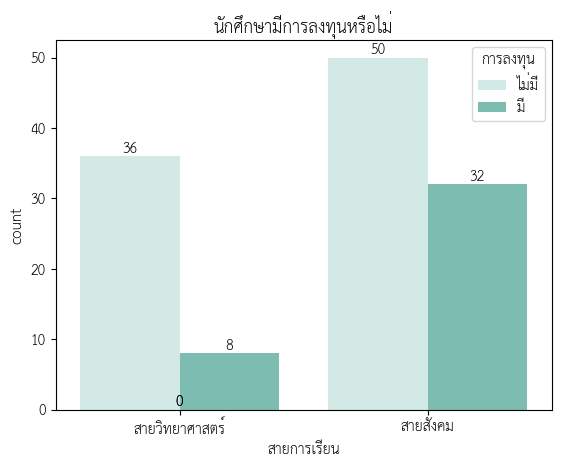

In [ ]:
#Bar Chart รายละเอียดเปรียบเทียบระหว่างคณะสายสังคมกับคณะสายวิทยาศาสตร์ ข้อที่ 4.5
sns.countplot(x = 'สายการเรียน', hue = 'การลงทุน', data = fin_df, palette=['#D0ECE7','#73C6B6'])
counting = fin_df['การวางแผนทางการเงิน'].value_counts()

for p in plt.gca().patches:
    count = int(round(p.get_height()))
    plt.gca().annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('นักศึกษามีการลงทุนหรือไม่')

##4.6) ความคิดเห็นต่อค่าครองชีพ

4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์
                     9
ค่อนข้างแพง          3
ค่าครองชีพสูง       36
ค่าที่พักสูงไป       7
ค่าหอและอาหารสูง    11
บางอย่างราคาแพง      3
อาหารแพง            15
เงินไม่พอใช้         1
เหมาะสม             11
แพง                 30
dtype: int64


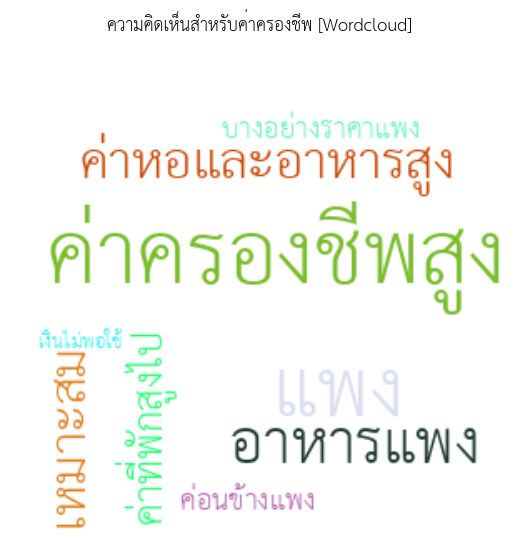

In [ ]:
# Wordcloud แสดงความถี่ของคำตอบในข้อ 4.6
type_word_4_6 = fin_df.groupby('4.6) นักศึกษามีความคิดเห็นอย่างไรสำหรับค่าครองชีพในการใช้ชีวิตเป็นนักศึกษา มหาวิทยาลัยธรรมศาสตร์')
type_word_4_6 = type_word_4_6.size()
print(type_word_4_6)
font = 'thsarabunnew-webfont.ttf'
text = dict(zip(type_word_4_6.index, type_word_4_6.values))
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
  return tuple([random.randint(0, 255) for i in range(3)])
wordcloud_4_6 = WordCloud(width=300, height=300, background_color='white',
                      font_path=font, font_step=5,
                      stopwords=set(STOPWORDS), max_font_size=60).generate_from_frequencies(text)
wordcloud_4_6.recolor(color_func=color_func)
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud_4_6, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('ความคิดเห็นสำหรับค่าครองชีพ [Wordcloud]')
plt.show()

##4.7) ปัญหาทางการเงิน

4.7)  ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ
ค่าใช้จ่ายสูงเกินไป               25
จ่ายค่าอาหารและหอมากเกินไป         6
มีหนี้สิน                          3
ยืมเงิน                            5
รายได้น้อยกว่ารายจ่าย             15
เงินเดือนชนเดือน                   5
เงินไม่เพียงพอ                    25
ใช้จ่ายไม่เป็นไปตามที่วางแผน       2
ใช้เงินกับอาหารเยอะเกินไป          6
ใช้เงินเก็บในการใช้จ่าย            1
ไม่พบเจอปัญหา                     23
ไม่วางแผนการเงินทำให้เงินไม่พอ     4
ไม่เหลือเงินออม                    6
dtype: int64


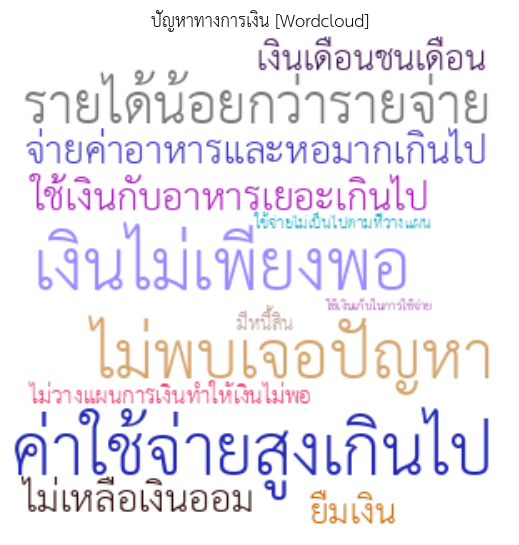

In [ ]:
# Wordcloud แสดงความถี่ของคำตอบในข้อ 4.7
type_word_4_7 = fin_df.groupby('4.7)  ขอความกรุณาระบุปัญหาทางการเงินที่นักศึกษาหรือคนรอบตัวพบเจอ')
type_word_4_7= type_word_4_7.size()
print(type_word_4_7)
font = 'thsarabunnew-webfont.ttf'
text = dict(zip(type_word_4_7.index, type_word_4_7.values))
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
  return tuple([random.randint(0, 255) for i in range(3)])
wordcloud_4_7 = WordCloud(width=300, height=300, background_color='white',
                      font_path=font, font_step=5,
                      stopwords=set(STOPWORDS), max_font_size=60).generate_from_frequencies(text)
wordcloud_4_7.recolor(color_func=color_func)
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud_4_7, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('ปัญหาทางการเงิน [Wordcloud]')
plt.show()

##Overall Part4

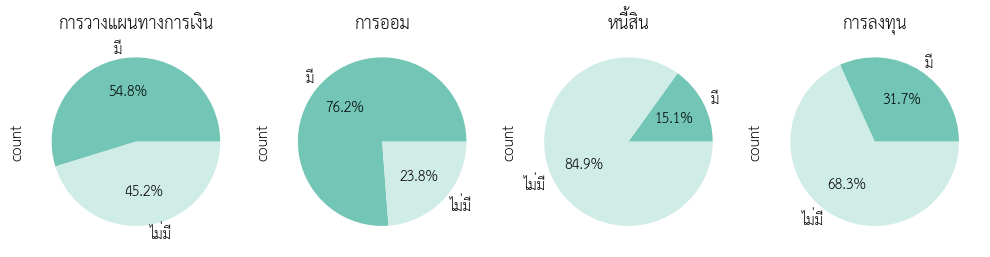

In [ ]:
#ภาพรวมคำตอบข้อที่ 4.2 - 4.5
colours = ['#73C6B6','#D0ECE7']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

#4.2
pie_value_4_2 = fin_df['การวางแผนทางการเงิน'].value_counts().sort_index()
pie_value_4_2.plot(kind='pie', colors=colours, autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('การวางแผนทางการเงิน')

#4.3
pie_value_4_3 = fin_df[ 'เงินออม'].value_counts().sort_index()
pie_value_4_3.plot(kind='pie', colors=colours, autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('การออม')

#4.4
pie_value_4_4 = fin_df[  'หนี้สิน'].value_counts().sort_index()
pie_value_4_4.plot(kind='pie', colors=colours, autopct='%1.1f%%', ax=axes[2])
axes[2].set_title('หนี้สิน')

#4.5
pie_value_4_5 = fin_df[ 'การลงทุน'].value_counts().sort_index()
pie_value_4_5.plot(kind='pie', colors=colours, autopct='%1.1f%%', ax=axes[3])
axes[3].set_title('การลงทุน')

plt.tight_layout()
plt.show()

# Dashboard

In [ ]:
! pip install streamlit -q

In [140]:
!pip install pyngrok

import streamlit as st

### Create Function

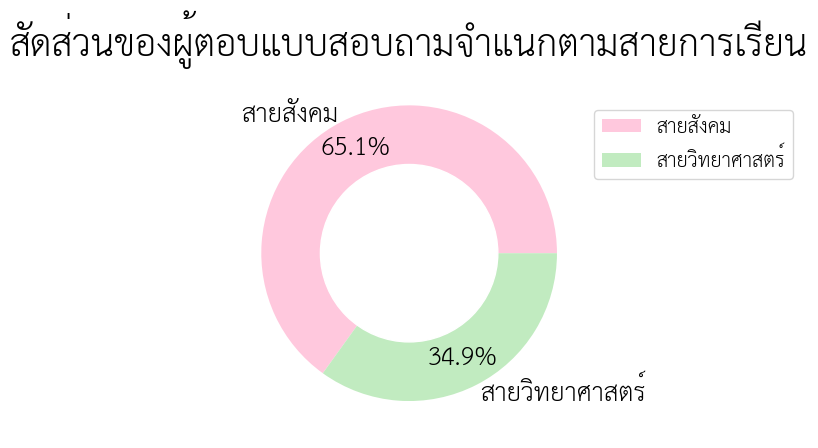

In [135]:
def field_chart(sorted_count):
    outer_c = ['#FFC8DD','#C1EBC0','#FAFABE', '#F6CA94', '#F09EA7', '#C7CAFF', '#CDABEB', '#e27396', '#e2f9fe', 'hotpink', 'coral']


    # Create the pie chart
    plt.pie(sorted_count, labels=sorted_count.index, colors=outer_c, radius=1,
            autopct='%1.1f%%', labeldistance=1.05, pctdistance=0.8, textprops={'fontsize': 18})

    # legend
    plt.legend(loc=(1, 0.7), fontsize=14)

    #small circle
    small_circle = plt.Circle((0, 0), 0.6, color='white')
    plt.gca().add_artist(small_circle)

    #title
    plt.title(f'สัดส่วนของผู้ตอบแบบสอบถามจำแนกตามสายการเรียน', fontsize=26, weight='bold', loc='center')

    # Show
    plt.show()

field_chart(sorted_count)

In [136]:
def plot_expense(df_edu0, df_f0, df_bt0, df_nec0, df_elec0, df_tp5, df_ent5, df_h0,
                               edu_c, food_c, beauty_c, nec_c, elec_c, transport_c, ent_c, health_c):
    fig = make_subplots(rows=2, cols=4, subplot_titles=('ด้านการศึกษา', 'ด้านอาหาร', 'ด้านความงาม',
                                                        'ด้านของใช้จำเป็น', 'ด้านค่าไฟฟ้า', 'ด้านการเดินทาง', 'ด้านความบันเทิง',
                                                        'ด้านสุขภาพ'))

    # Education
    fig.add_trace(
        go.Bar(x=df_edu0['สายการเรียน'], y=df_edu0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_edu0['สัดส่วน']],
               textfont=dict(size=10),
               marker=dict(color=df_edu0['ด้านการศึกษา'].map(edu_c)), name='ด้านการศึกษา'),
        row=1, col=1)

    # Food
    fig.add_trace(
        go.Bar(x=df_f0['สายการเรียน'], y=df_f0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_f0['สัดส่วน']],
               textfont=dict(size=10),
               marker=dict(color=df_f0['ด้านอาหาร'].map(food_c)), name='ด้านอาหาร'),
        row=1, col=2)

    # Beauty
    fig.add_trace(
        go.Bar(x=df_bt0['สายการเรียน'], y=df_bt0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_bt0['สัดส่วน']],
               textfont=dict(size=10),
               marker=dict(color=df_bt0['ด้านความงาม'].map(beauty_c)), name='ด้านความงาม'),
        row=1, col=3)

    # Necessary
    fig.add_trace(
        go.Bar(x=df_nec0['สายการเรียน'], y=df_nec0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_nec0['สัดส่วน']],
               textfont=dict(size=10),
               marker=dict(color=df_nec0['ด้านของจำเป็นส่วนตัว'].map(nec_c)), name='ด้านของใช้จำเป็น'),
        row=1, col=4)

    # Electricity
    fig.add_trace(
        go.Bar(x=df_elec0['สายการเรียน'], y=df_elec0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_elec0['สัดส่วน']],
               textfont=dict(size=10),
               marker=dict(color=df_elec0['ด้านค่าไฟฟ้า'].map(elec_c)), name='ด้านค่าไฟฟ้า'),
        row=2, col=1)

    # Transportation
    fig.add_trace(
        go.Bar(x=df_tp5['สายการเรียน'], y=df_tp5['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_tp5['สัดส่วน']],
               textfont=dict(size=8),
               marker=dict(color=df_tp5['ด้านการเดินทาง'].map(transport_c)), name='ด้านการเดินทาง'),
        row=2, col=2)

    # Entertainment
    fig.add_trace(
        go.Bar(x=df_ent5['สายการเรียน'], y=df_ent5['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_ent5['สัดส่วน']],
               textfont=dict(size=8),
               marker=dict(color=df_ent5['ด้านความบันเทิง'].map(ent_c)), name='ด้านความบันเทิง'),
        row=2, col=3)

    # Health
    fig.add_trace(
        go.Bar(x=df_h0['สายการเรียน'], y=df_h0['สัดส่วน'], orientation='v', text=[f'{m}%' for m in df_h0['สัดส่วน']],
               textfont=dict(size=8),
               marker=dict(color=df_h0['ด้านสุขภาพ'].map(health_c)), name='ด้านสุขภาพ'),
        row=2, col=4)

    # Layout
    fig.update_layout(title="ค่าใช้จ่ายของนักศึกษาแบ่งตามประเภทต่างๆ",
                      xaxis_title="สายการเรียน",
                      yaxis_title="สัดส่วนของนักศึกษา",
                      height=850,
                      width=1000,
                      showlegend=False,
                      title_x=0.5,
                      title_y=0.95)

    return fig


plot_expense(df_edu0, df_f0, df_bt0, df_nec0, df_elec0, df_tp5, df_ent5, df_h0,edu_c, food_c, beauty_c, nec_c, elec_c, transport_c, ent_c, health_c)


In [137]:
def plot_expense_1(fin_df):
    # สร้าง DataFrame จาก fin_df (ต้อง import pandas ด้วย)
    fin_df = pd.DataFrame(fin_df)

    # แบ่งข้อมูลตามสภาวะทางการเงิน
    status_money = fin_df.groupby('สภาวะทางการเงิน')
    status_mm = status_money.size().values
    status_mmm = status_money.size().index

    # เลือกสภาวะทางการเงินที่ต้องการแสดง (ในที่นี้เลือกเป็น index ที่ 1)
    target = 1
    factor = status_money.get_group(status_mmm[target])
    factor = factor['สภาวะทางการเงิน'].str.get_dummies(";").sum()

    # pie chart parameters
    sm_val = status_mm
    sm_labels = status_mmm

    colorsq = ['#117A65', '#73C6B6', '#D0ECE7']
    pull = [0, 0, 0, 0, 0, 0, 0, 0]
    pull[target] = 0.2

    # สร้างกราฟ Pie chart
    fig = go.Figure(go.Pie(
        labels=sm_labels,
        values=sm_val,
        texttemplate="%{label}: %{value} (%{percent})",
        textposition="outside",
        hole=0.4,
        pull=pull
    ))

    # อัพเดท layout ของกราฟ
    fig.update_layout(
        title="สภาวะทางการเงินของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        colorway=colorsq,
        legend=dict(
            title="สภาวะทางการเงิน",
            orientation="v"
        ),
        height=500,
        width=700
    )

    return fig

# เรียกใช้ฟังก์ชัน plot_expense() โดยส่งข้อมูล fin_df เข้าไป
plot_expense_1(fin_df)

In [138]:
def plot_expense_2(part3_df):
    part3_df['x'] = [random.uniform(0, 1) for i in range(len(part3_df))]
    part3_df['y'] = [random.uniform(0, 1) for i in range(len(part3_df))]
    fig = px.scatter(part3_df, x='ความพึงพอใจ', y='y', size='ขนาด',
                     color='ค่าเฉลี่ยคะแนน',
                     text='ค่าเฉลี่ยคะแนน', hover_name='ความพึงพอใจ',
                     hover_data={'x': False, 'y': False, 'ขนาด': False},
                     size_max=105, title='ค่าเฉลี่ยระดับความพึงพอใจในราคาด้านต่าง ๆ <br> 1 คือ ถูกมาก, 2 คือ ถูก, 3 คือ เหมาะสม, 4 คือ แพง, 5 คือ แพงมาก ',
                     labels={'ความพึงพอใจ': 'ระดับความพึงพอใจ', 'ค่าเฉลี่ยคะแนน': 'ค่าเฉลี่ยคะแนน'},
                     color_continuous_scale='viridis')  # สามารถเปลี่ยนเป็น 'plasma', 'magma', 'inferno', 'cividis' เป็นต้น
    fig.update_traces(textposition='middle center')
    fig.update_layout(legend_title_text='ความพึงพอใจ', showlegend=False, width=800, plot_bgcolor='white')
    fig.update_layout(title_x=0.5)

    fig.update_xaxes(title_text='ความพึงพอใจ')
    fig.update_yaxes(showticklabels=False)

    return fig

plot_expense_2(part3_df)

### Layout

In [141]:
col_dashboard = st.columns((1.5, 4.5, 2), gap='medium')

In [ ]:
with col_dashboard[0]:
  st.markdown('#### สัดส่วนผู้ตอบแบบสอบถาม')
  field_donut = field_chart(sorted_count)

  st.markdown('#### สภาวะทางการเงิน')
  fig4 = plot_expense_1(fin_df)
  st.plotly_chart(fig4)


In [ ]:
with col_dashboard[1]:
  st.markdown('#### ค่าใช้จ่ายแต่ละด้าน')
  expense = plot_expense(df_edu0, df_f0, df_bt0, df_nec0, df_elec0, df_tp5, df_ent5, df_h0,edu_c, food_c, beauty_c, nec_c, elec_c, transport_c, ent_c, health_c)

  st.markdown('#### ค่าเฉลี่ยคะแนนในแต่ละด้าน')
  fig3 = plot_expense_2(part3_df)
  st.plotly_chart(fig3)



